In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_rows", None)

In [5]:
HDF = pd.read_csv('train.csv')

In [6]:
HDF_test = pd.read_csv('test.csv')

In [7]:
HDF.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0 

In [8]:
HDF.shape

(1168, 81)

Test data

In [9]:
HDF_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [10]:
HDF_test.shape

(292, 80)

In [11]:
HDF.columns.difference(HDF_test.columns) #the column missing from test dataset

Index(['SalePrice'], dtype='object')

# checking for null values

In [12]:
HDF[HDF.columns[HDF.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0             NaN   NaN       None         0.0       Gd       TA           No   
1            95.0   NaN       None         0.0       TA       Gd           Gd   
2            92.0   NaN       None         0.0       Gd       TA           Av   
3           105.0   NaN    BrkFace       480.0       Gd       TA           No   
4             NaN   NaN      Stone       126.0       Gd       TA           No   
5            58.0   NaN       None         0.0       Gd       TA           Av   
6             NaN   NaN    BrkFace       180.0       Gd       TA           No   
7            88.0   NaN     BrkCmn        67.0       TA       TA           No   
8            70.0   NaN       None         0.0       TA       TA           No   
9            80.0   NaN       None         0.0       TA       TA           No   
10           50.0   NaN       None         0.0       TA       TA           No   
11           44.0   NaN    BrkFace       223.0       Gd       TA           No   
12          129.0   NaN       None         0.0       Ex       TA           No   
13           80.0   NaN     BrkCmn        66.0       TA       TA           No   
14           59.0   NaN       None         0.0       TA       TA           No   
15           55.0   NaN       None         0.0       TA       Fa           No   
16            NaN   NaN       None         0.0       TA       TA           Av   
17           64.0   NaN      Stone        82.0       Gd       TA           Av   
18            NaN   NaN    BrkFace       174.0       TA       Gd           No   
19           24.0   NaN    BrkFace       304.0       TA       TA           No   
20           80.0   NaN    BrkFace       172.0       Gd       TA           No   
21           70.0   NaN       None         0.0       Gd       TA           Av   
22           68.0   NaN       None         0.0       TA       TA           Mn   
23            NaN   NaN       None         0.0       TA       TA           No   
24           71.0   NaN    BrkFace       166.0       TA       TA           Mn   
25            NaN   NaN    BrkFace       184.0       Gd       TA           Mn   
26            NaN   NaN       None         0.0       TA       TA           No   
27           88.0   NaN      Stone       350.0       Ex       TA           Av   
28           58.0   NaN       None         0.0       TA       Fa           No   
29           74.0   NaN       None         0.0       TA       TA           No   
30           61.0   NaN    BrkFace       412.0       Ex       TA           No   
31           60.0  Grvl       None         0.0       TA       TA           No   
32            NaN   NaN       None         1.0       Gd       TA           No   
33            NaN   NaN       None         0.0       TA       TA           No   
34            NaN   NaN       None         0.0      NaN      NaN          NaN   
35          120.0   NaN       None         0.0       TA       TA           Av   
36           80.0   NaN    BrkFace       189.0       Gd       TA           No   
37           84.0   NaN       None         0.0       TA       Gd           Av   
38            NaN   NaN       None         0.0       Gd       TA           Av   
39           50.0   NaN       None         0.0       TA       TA           No   
40          141.0   NaN      Stone       112.0       TA       Gd           Gd   
41           70.0   NaN       None         0.0       Gd       TA           No   
42           30.0  Pave       None         0.0       Gd       TA           No   
43           24.0   NaN      Stone        50.0       Gd       TA           No   
44           65.0   NaN    BrkFace       220.0       Gd       Gd           Av   
45           76.0   NaN       None         0.0       TA       TA           Gd   
46           60.0   NaN    BrkFace        16.0       Gd       TA           No   
47          100.0   NaN       None         0.0       TA       TA           No   
48           50.0   NaN       None   

There are 18 columns in train dataframe with null values.

In [13]:
HDF_test[HDF_test.columns[HDF_test.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0           86.0   NaN      Stone       200.0       Ex       TA           Gd   
1            NaN   NaN       None         0.0       Gd       TA           Av   
2            NaN   NaN       None         0.0       Gd       TA           Av   
3           75.0   NaN       None         0.0       TA       TA           No   
4           86.0   NaN      Stone        74.0       Gd       TA           Mn   
5           21.0   NaN       None         0.0       Gd       TA           Av   
6           35.0   NaN    BrkFace        80.0       Gd       TA           Gd   
7          107.0   NaN      Stone       436.0       Ex       TA           Gd   
8            NaN   NaN    BrkFace       145.0       Gd       TA           Gd   
9           32.0   NaN    BrkFace       320.0       Ex       TA           No   
10          60.0   NaN       None         0.0       TA       TA           No   
11           NaN   NaN       None         0.0       TA       TA           No   
12         100.0   NaN       None         0.0       TA       TA           No   
13          50.0   NaN    BrkFace       226.0       TA       TA           Gd   
14         110.0   NaN    BrkFace       375.0       Gd       TA           Av   
15          50.0  Grvl       None         0.0       TA       Gd           No   
16           NaN   NaN       None         0.0       TA       TA           No   
17          70.0   NaN       None         0.0       TA       TA           No   
18          35.0   NaN    BrkFace       218.0       Gd       TA           No   
19          44.0   NaN       None         0.0       Gd       Gd           No   
20          50.0   NaN       None         0.0       TA       TA           No   
21          71.0   NaN    BrkFace       148.0       TA       TA           No   
22           NaN   NaN    BrkFace       196.0       TA       TA           No   
23          70.0   NaN       None         0.0      NaN      NaN          NaN   
24          52.0   NaN       None         0.0       Gd       TA           Mn   
25          37.0   NaN       None         0.0       TA       TA           No   
26          62.0   NaN       None         0.0       Gd       TA           No   
27          78.0   NaN    BrkFace       200.0       TA       TA           No   
28          90.0   NaN    BrkFace       420.0       TA       TA           No   
29          60.0   NaN       None         0.0       TA       Fa           No   
30          68.0   NaN       None         0.0      NaN      NaN          NaN   
31          67.0   NaN        NaN         NaN       Gd       TA           No   
32          70.0   NaN       None         0.0       Gd       TA           No   
33          80.0   NaN    BrkFace       387.0       TA       TA           No   
34          52.0   NaN       None         0.0       TA       TA           No   
35          76.0   NaN       None         0.0       Gd       TA           No   
36          70.0   NaN    BrkFace       105.0       Gd       Gd           No   
37          21.0   NaN    BrkFace       268.0       TA       TA           No   
38           NaN   NaN       None         0.0       TA       Gd           No   
39          24.0   NaN       None         0.0       TA       TA           No   
40          50.0   NaN       None         0.0       TA       TA           No   
41          80.0   NaN    BrkFace       473.0       Gd       TA           No   
42           NaN   NaN       None         0.0       Gd       TA           Gd   
43          62.0  Pave       None         0.0       Gd       TA           No   
44          57.0   NaN       None         0.0       Gd       TA           Av   
45          52.0   NaN       None         0.0       TA       Fa           No   
46          70.0   NaN       None         0.0       TA       TA           No   
47          30.0  Grvl       None         0.0       Fa       TA           No   
48          34.0   NaN      Stone       166.0       Gd       TA           No   
49   

There are 19 columns in test dataframe with null values.

In [14]:
HDF.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
HDF_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [16]:
#Checking for blank spaces, random characters in each column

In [17]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A",'na','n/a']

for c in HDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((HDF[c] == s).sum())

  in Id =  0
? in Id =  0
- in Id =  0
 ? in Id =  0
 - in Id =  0
?  in Id =  0
-  in Id =  0
 ?  in Id =  0
 -  in Id =  0
NA in Id =  0
N/A in Id =  0
 NA in Id =  0
 N/A in Id =  0
na in Id =  0
n/a in Id =  0
  in MSSubClass =  0
? in MSSubClass =  0
- in MSSubClass =  0
 ? in MSSubClass =  0
 - in MSSubClass =  0
?  in MSSubClass =  0
-  in MSSubClass =  0
 ?  in MSSubClass =  0
 -  in MSSubClass =  0
NA in MSSubClass =  0
N/A in MSSubClass =  0
 NA in MSSubClass =  0
 N/A in MSSubClass =  0
na in MSSubClass =  0
n/a in MSSubClass =  0
  in MSZoning =  0
? in MSZoning =  0
- in MSZoning =  0
 ? in MSZoning =  0
 - in MSZoning =  0
?  in MSZoning =  0
-  in MSZoning =  0
 ?  in MSZoning =  0
 -  in MSZoning =  0
NA in MSZoning =  0
N/A in MSZoning =  0
 NA in MSZoning =  0
 N/A in MSZoning =  0
na in MSZoning =  0
n/a in MSZoning =  0
  in LotFrontage =  0
? in LotFrontage =  0
- in LotFrontage =  0
 ? in LotFrontage =  0
 - in LotFrontage =  0
?  in LotFrontage =  0
-  in LotFron

There are no blank spaces, random characters in columns of train dataset

In [18]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A",'na','n/a']

for c in HDF_test:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((HDF_test[c] == s).sum())

  in Id =  0
? in Id =  0
- in Id =  0
 ? in Id =  0
 - in Id =  0
?  in Id =  0
-  in Id =  0
 ?  in Id =  0
 -  in Id =  0
NA in Id =  0
N/A in Id =  0
 NA in Id =  0
 N/A in Id =  0
na in Id =  0
n/a in Id =  0
  in MSSubClass =  0
? in MSSubClass =  0
- in MSSubClass =  0
 ? in MSSubClass =  0
 - in MSSubClass =  0
?  in MSSubClass =  0
-  in MSSubClass =  0
 ?  in MSSubClass =  0
 -  in MSSubClass =  0
NA in MSSubClass =  0
N/A in MSSubClass =  0
 NA in MSSubClass =  0
 N/A in MSSubClass =  0
na in MSSubClass =  0
n/a in MSSubClass =  0
  in MSZoning =  0
? in MSZoning =  0
- in MSZoning =  0
 ? in MSZoning =  0
 - in MSZoning =  0
?  in MSZoning =  0
-  in MSZoning =  0
 ?  in MSZoning =  0
 -  in MSZoning =  0
NA in MSZoning =  0
N/A in MSZoning =  0
 NA in MSZoning =  0
 N/A in MSZoning =  0
na in MSZoning =  0
n/a in MSZoning =  0
  in LotFrontage =  0
? in LotFrontage =  0
- in LotFrontage =  0
 ? in LotFrontage =  0
 - in LotFrontage =  0
?  in LotFrontage =  0
-  in LotFron

<AxesSubplot:>

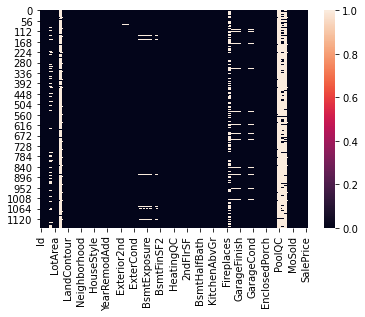

In [19]:
sns.heatmap(HDF.isnull()) #visualising null values in train dataset

Columns titled: Alley, PoolQC,MiscFeature,FireplaceQu,Fence have extremely sparse data with overwhelmingly high percentage of null values and therefore must be dropped.

<AxesSubplot:>

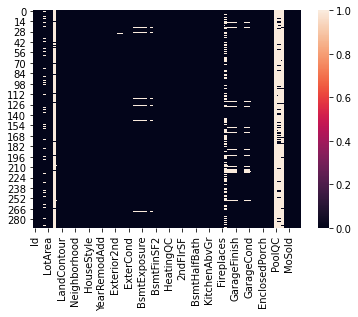

In [20]:
sns.heatmap(HDF_test.isnull()) #visualising null values in test dataset

Columns titled: Alley, PoolQC,MiscFeature,FireplaceQu,Fence have extremely sparse data with overwhelmingly high percentage of null values and therefore must be dropped.

In [22]:
HDF.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [23]:
HDF_test.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [24]:
HDF.shape

(1168, 76)

In [25]:
HDF_test.shape

(292, 75)

In [26]:
#Dropping the ID columns from test and train datasets, since they don't contribute to building a good model for predicting the target variable values.

In [27]:
HDF.drop(columns=['Id'],inplace=True)

In [28]:
HDF_test.drop(columns=['Id'],inplace=True)

In [29]:
HDF.dtypes[HDF.dtypes == 'object'] #Identifying the Categorical Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [30]:
HDF.dtypes[HDF.dtypes != 'object'] #Identifying the non-object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [31]:
HDF[HDF.columns[HDF.isnull().any()]].shape

(1168, 13)

In [32]:
HDF_test[HDF_test.columns[HDF_test.isnull().any()]].shape

(292, 14)

In [33]:
#Finding the null value percentage in each of the columns in train dataset

In [34]:
for c in HDF[HDF.columns[HDF.isnull().any()]]:
    perct = HDF[c].isnull().sum()/1168*100
    print(f"null value % in {c} is: {perct}")

null value % in LotFrontage is: 18.32191780821918
null value % in MasVnrType is: 0.5993150684931506
null value % in MasVnrArea is: 0.5993150684931506
null value % in BsmtQual is: 2.5684931506849313
null value % in BsmtCond is: 2.5684931506849313
null value % in BsmtExposure is: 2.654109589041096
null value % in BsmtFinType1 is: 2.5684931506849313
null value % in BsmtFinType2 is: 2.654109589041096
null value % in GarageType is: 5.47945205479452
null value % in GarageYrBlt is: 5.47945205479452
null value % in GarageFinish is: 5.47945205479452
null value % in GarageQual is: 5.47945205479452
null value % in GarageCond is: 5.47945205479452


In [35]:
#Finding the null value percentage in each of the columns in test dataset

In [36]:
for c in HDF_test[HDF_test.columns[HDF_test.isnull().any()]]:
    perct = HDF_test[c].isnull().sum()/292*100
    print(f"null value % in {c} is: {perct}")

null value % in LotFrontage is: 15.41095890410959
null value % in MasVnrType is: 0.3424657534246575
null value % in MasVnrArea is: 0.3424657534246575
null value % in BsmtQual is: 2.3972602739726026
null value % in BsmtCond is: 2.3972602739726026
null value % in BsmtExposure is: 2.3972602739726026
null value % in BsmtFinType1 is: 2.3972602739726026
null value % in BsmtFinType2 is: 2.3972602739726026
null value % in Electrical is: 0.3424657534246575
null value % in GarageType is: 5.821917808219178
null value % in GarageYrBlt is: 5.821917808219178
null value % in GarageFinish is: 5.821917808219178
null value % in GarageQual is: 5.821917808219178
null value % in GarageCond is: 5.821917808219178


In [37]:
HDF[HDF.columns[HDF.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   954 non-null    float64
 1   MasVnrType    1161 non-null   object 
 2   MasVnrArea    1161 non-null   float64
 3   BsmtQual      1138 non-null   object 
 4   BsmtCond      1138 non-null   object 
 5   BsmtExposure  1137 non-null   object 
 6   BsmtFinType1  1138 non-null   object 
 7   BsmtFinType2  1137 non-null   object 
 8   GarageType    1104 non-null   object 
 9   GarageYrBlt   1104 non-null   float64
 10  GarageFinish  1104 non-null   object 
 11  GarageQual    1104 non-null   object 
 12  GarageCond    1104 non-null   object 
dtypes: float64(3), object(10)
memory usage: 118.8+ KB


Majority of the columns witll null values is of object datatype

In [38]:
HDF_test[HDF_test.columns[HDF_test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   247 non-null    float64
 1   MasVnrType    291 non-null    object 
 2   MasVnrArea    291 non-null    float64
 3   BsmtQual      285 non-null    object 
 4   BsmtCond      285 non-null    object 
 5   BsmtExposure  285 non-null    object 
 6   BsmtFinType1  285 non-null    object 
 7   BsmtFinType2  285 non-null    object 
 8   Electrical    291 non-null    object 
 9   GarageType    275 non-null    object 
 10  GarageYrBlt   275 non-null    float64
 11  GarageFinish  275 non-null    object 
 12  GarageQual    275 non-null    object 
 13  GarageCond    275 non-null    object 
dtypes: float64(3), object(11)
memory usage: 32.1+ KB


Majority of the columns witll null values is of object datatype

In [39]:
HDF['LotFrontage'].mode()

0    60.0
dtype: float64

In [40]:
(HDF['MasVnrArea']==0.0).sum()/HDF['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

In [41]:
(HDF['MasVnrType']=='None').value_counts()

True     696
False    472
Name: MasVnrType, dtype: int64

# Using KNN Imputation technique for imputing missing data in LotFrontage .

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imp = KNNImputer(n_neighbors=2)

In [44]:
HDF[['LotFrontage']] = imp.fit_transform(HDF[['LotFrontage']])

In [45]:
HDF[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

There are no more null values in LotFrontage column

In [46]:
(HDF['MasVnrArea']==0.0).sum()/HDF['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

In [47]:
#Imputing The mose frequently occuring values to NaN values in each of the columns

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [50]:
si = si.fit(HDF[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [51]:
HDF[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(HDF[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [52]:
HDF.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no more null values present.

In [53]:
#Using KNN Imputation technique for imputing missing data in LotFrontage in test dataset .

In [54]:
from sklearn.impute import KNNImputer

In [55]:
imp = KNNImputer(n_neighbors=2)

In [56]:
HDF_test[['LotFrontage']] = imp.fit_transform(HDF_test[['LotFrontage']])

In [57]:
HDF_test[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

There are no more null values in LotFrontage column

In [58]:
#Imputing The mose frequently occuring values to NaN values in each of the columns in test dataset

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [61]:
si = si.fit(HDF_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [62]:
HDF_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(HDF_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [63]:
HDF_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no more null values present.

In [64]:
HDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [65]:
HDF.dtypes[HDF.dtypes == 'object'] #Identifying the object type Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [66]:
HDF.dtypes[HDF.dtypes != 'object'] #Identifying the non object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [67]:
HDF.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260  ...   
std      30.145255     20.785185   182.218483   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

Big difference between max value and 75% in SalePrice,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2, etc indicates presence of outliers.

higher std than mean in columns: MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch etc indicates presence of skewness.

# Interpreting Relationship between Independent and Dependent Variables

# Analyzing the continuous data type Target column

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

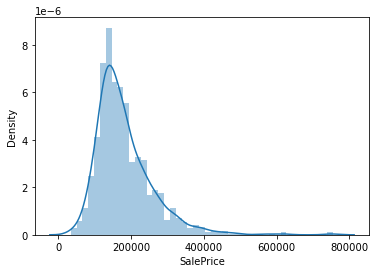

In [68]:
sns.distplot(HDF.SalePrice)

In [69]:
HDF.SalePrice.skew()

1.953877705368286

<AxesSubplot:xlabel='SalePrice'>

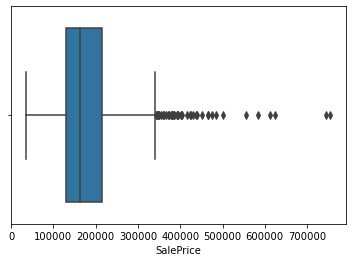

In [70]:
sns.boxplot(HDF.SalePrice)

There are outliers present in the data column

In [71]:
#Analyzing the Feature Columns

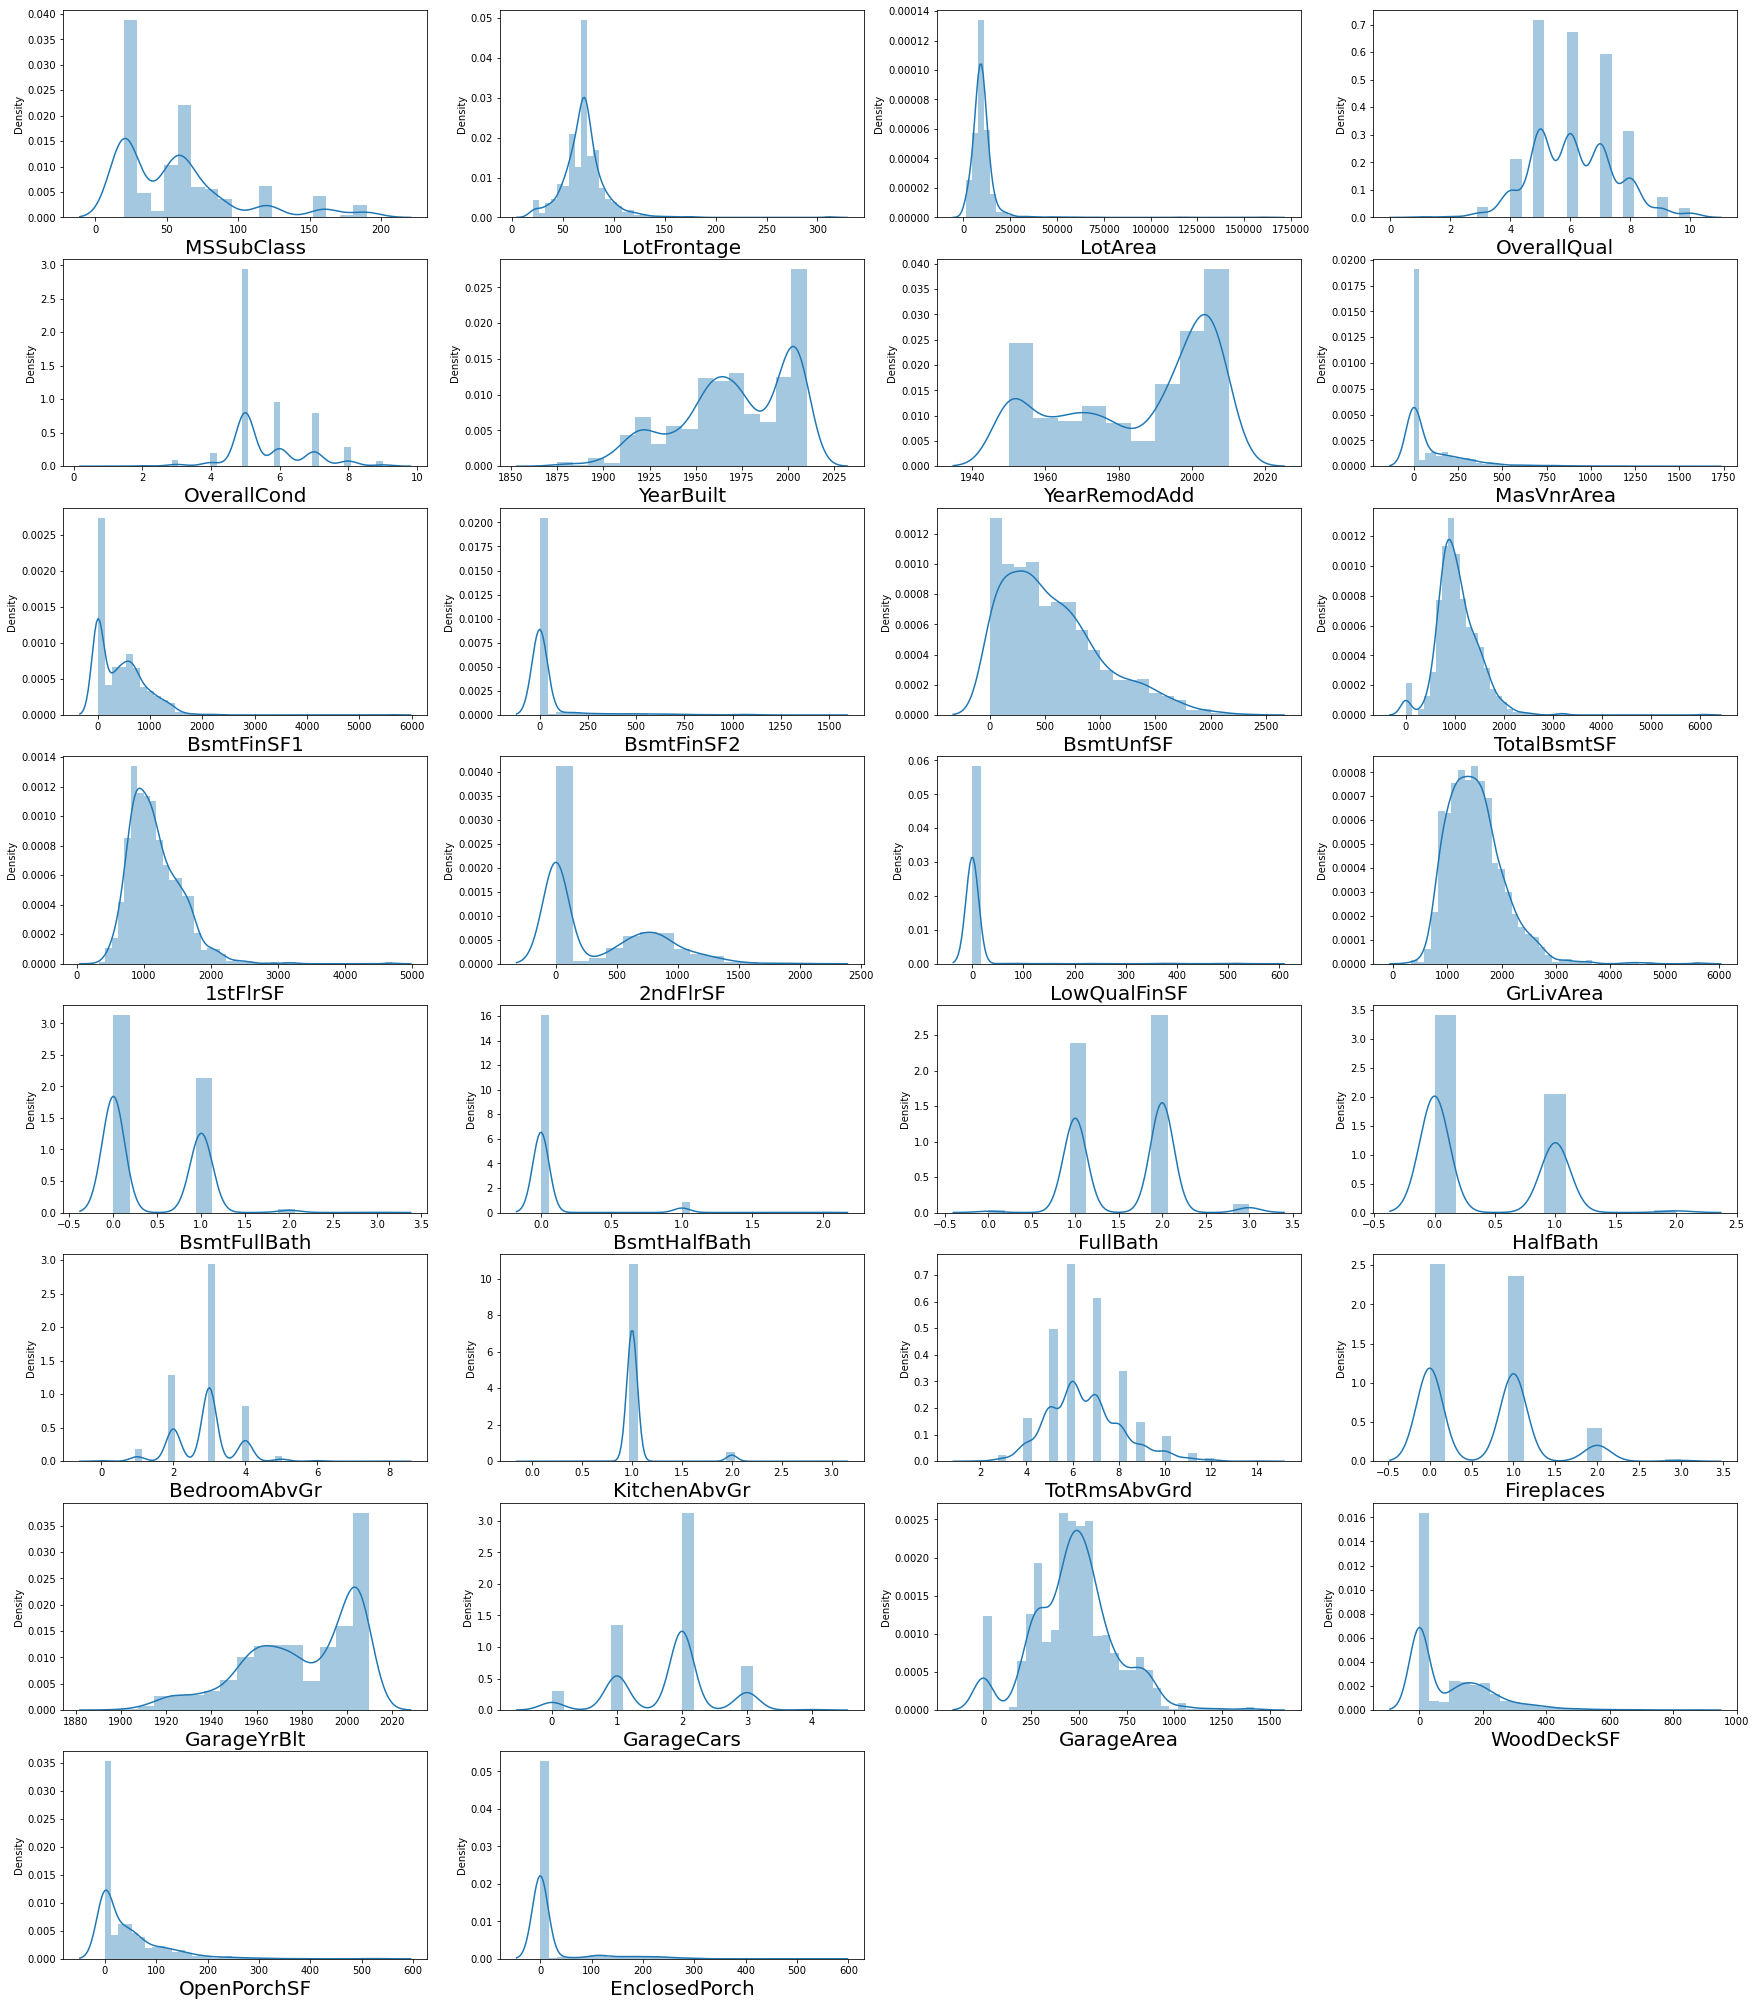

In [72]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in HDF[HDF.columns[HDF.dtypes != 'object']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(HDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [73]:
HDF[HDF.columns[HDF.dtypes != 'object']].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Considerable skewness exists in columns

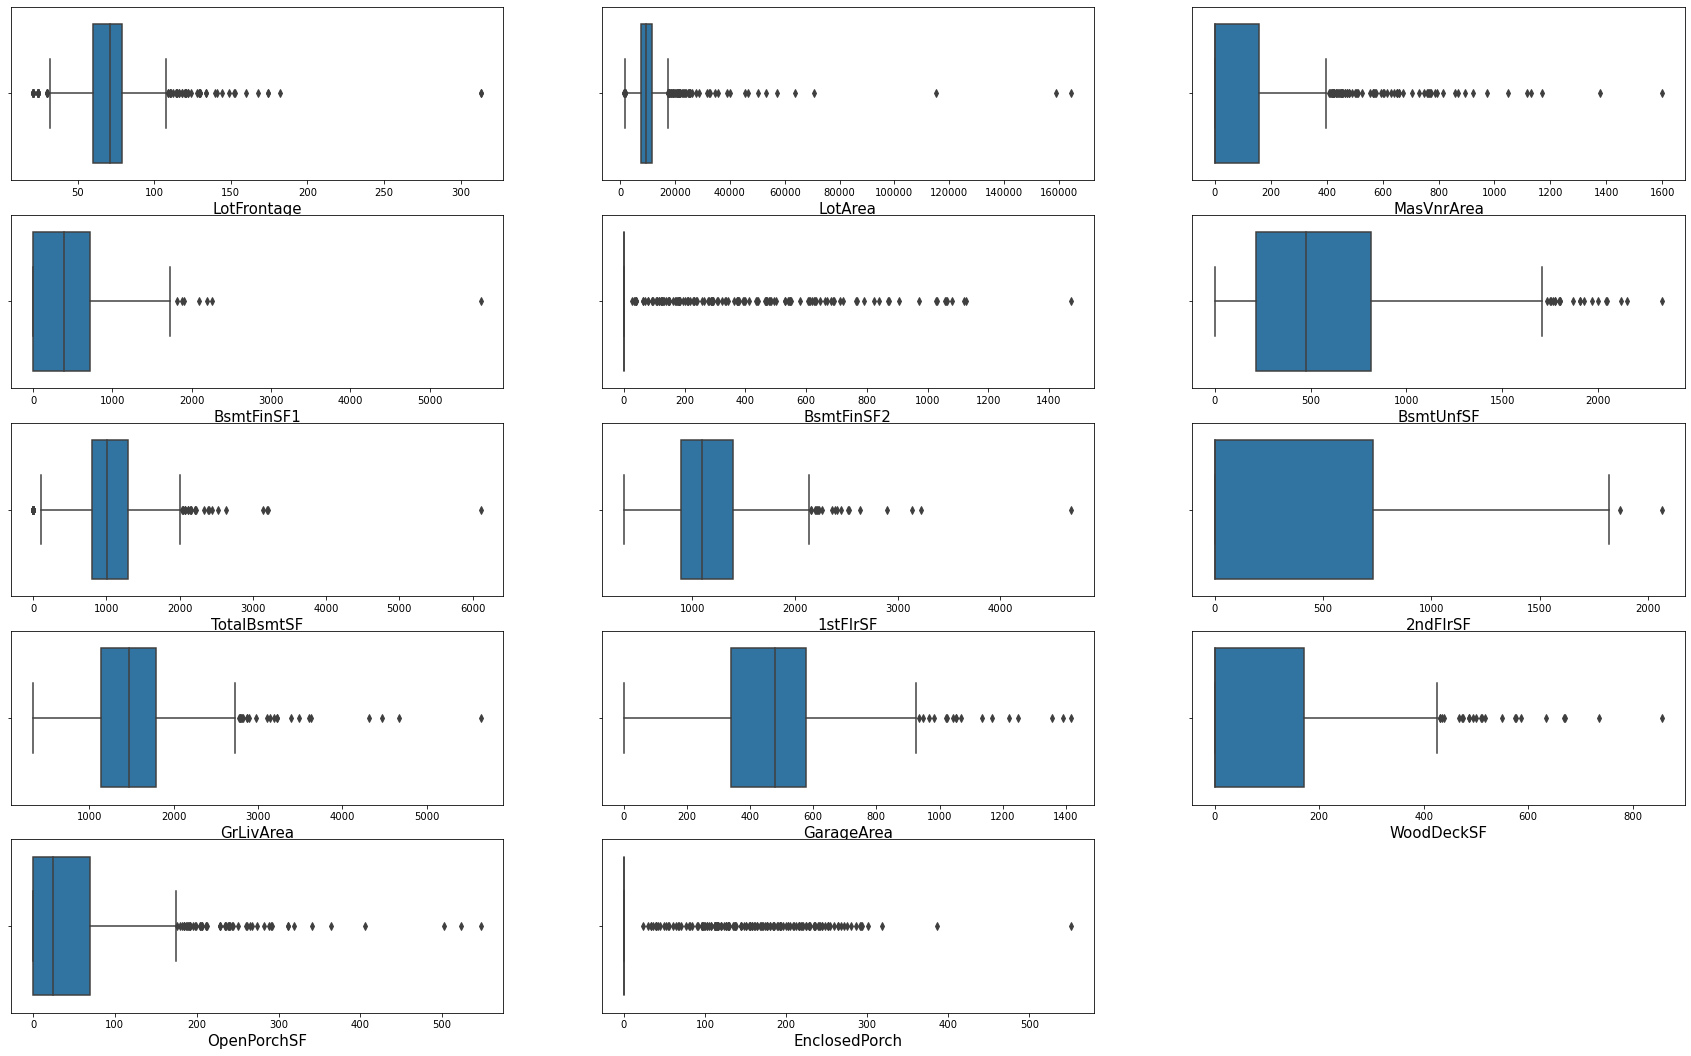

In [74]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]:
    if plotnum<=20:
        plt.subplot(8,3,plotnum)
        sns.boxplot(HDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [75]:
#Checking for Skewness in Data

In [76]:
HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
dtype: float64

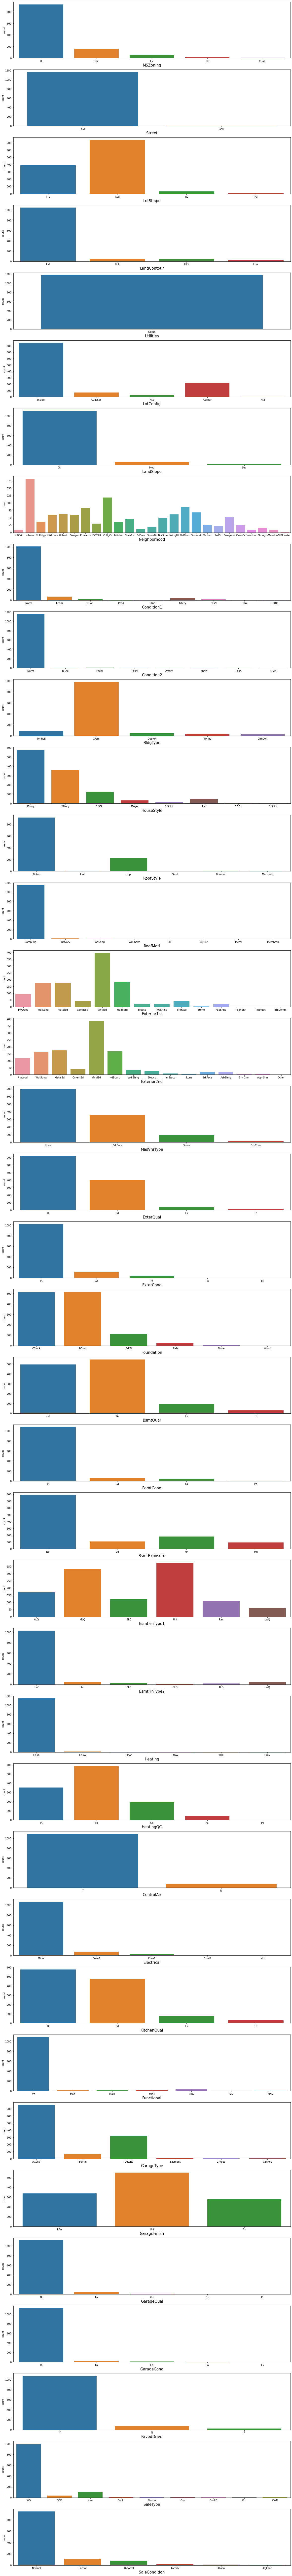

In [77]:
plt.figure(figsize=(20,200),facecolor='white')
plotnum=1
for col in HDF[HDF.columns[HDF.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.countplot(HDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

# Interpreting Relationship between Dependent Variable and Independent Variable Columns

Text(0.5, 1.0, 'Price Trend')

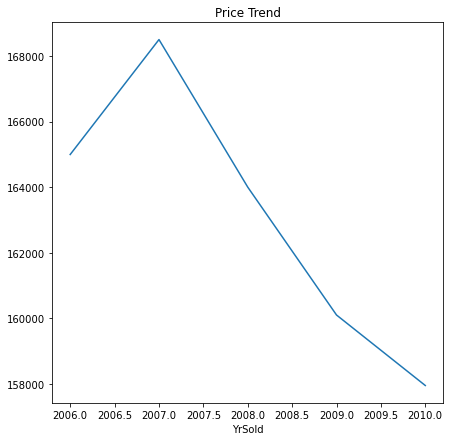

In [78]:
plt.figure(figsize=(7,7))
HDF.groupby('YrSold').median()['SalePrice'].plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Price Trend')

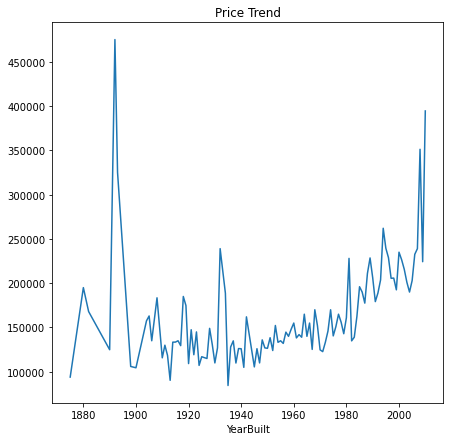

In [79]:
plt.figure(figsize=(7,7))
HDF.groupby('YearBuilt').median()['SalePrice'].plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Price Trend')

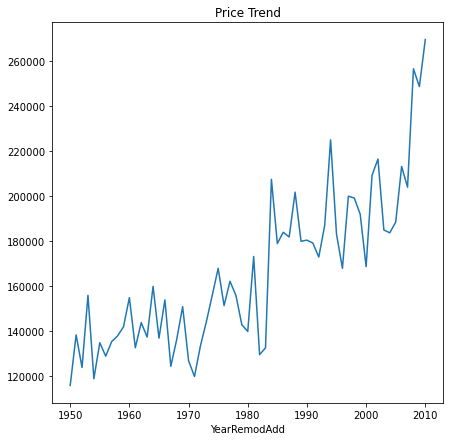

In [80]:
plt.figure(figsize=(7,7))
HDF.groupby('YearRemodAdd').median()['SalePrice'].plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Price Trend')

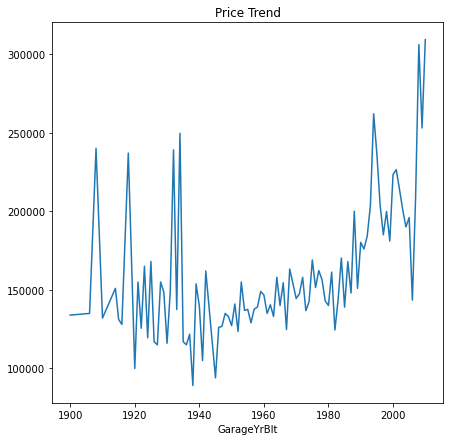

In [81]:
plt.figure(figsize=(7,7))
HDF.groupby('GarageYrBlt').median()['SalePrice'].plot()
plt.title('Price Trend')

In [82]:
HDF['House_Age'] = HDF['YearBuilt'].apply(lambda y: 2021 - y)

In [83]:
HDF['Remod_Age'] = HDF['YearRemodAdd'].apply(lambda y: 2021 - y) 

In [84]:
HDF['Garage_age'] = HDF['GarageYrBlt'].apply(lambda y: 2021 - y) 

In [85]:
HDF.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) 

In [86]:
HDF_test['House_Age'] = HDF_test['YearBuilt'].apply(lambda y: 2021 - y) 
HDF_test['Remod_Age'] = HDF_test['YearRemodAdd'].apply(lambda y: 2021 - y) 
HDF_test['Garage_age'] = HDF_test['GarageYrBlt'].apply(lambda y: 2021 - y) 
HDF_test.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True)

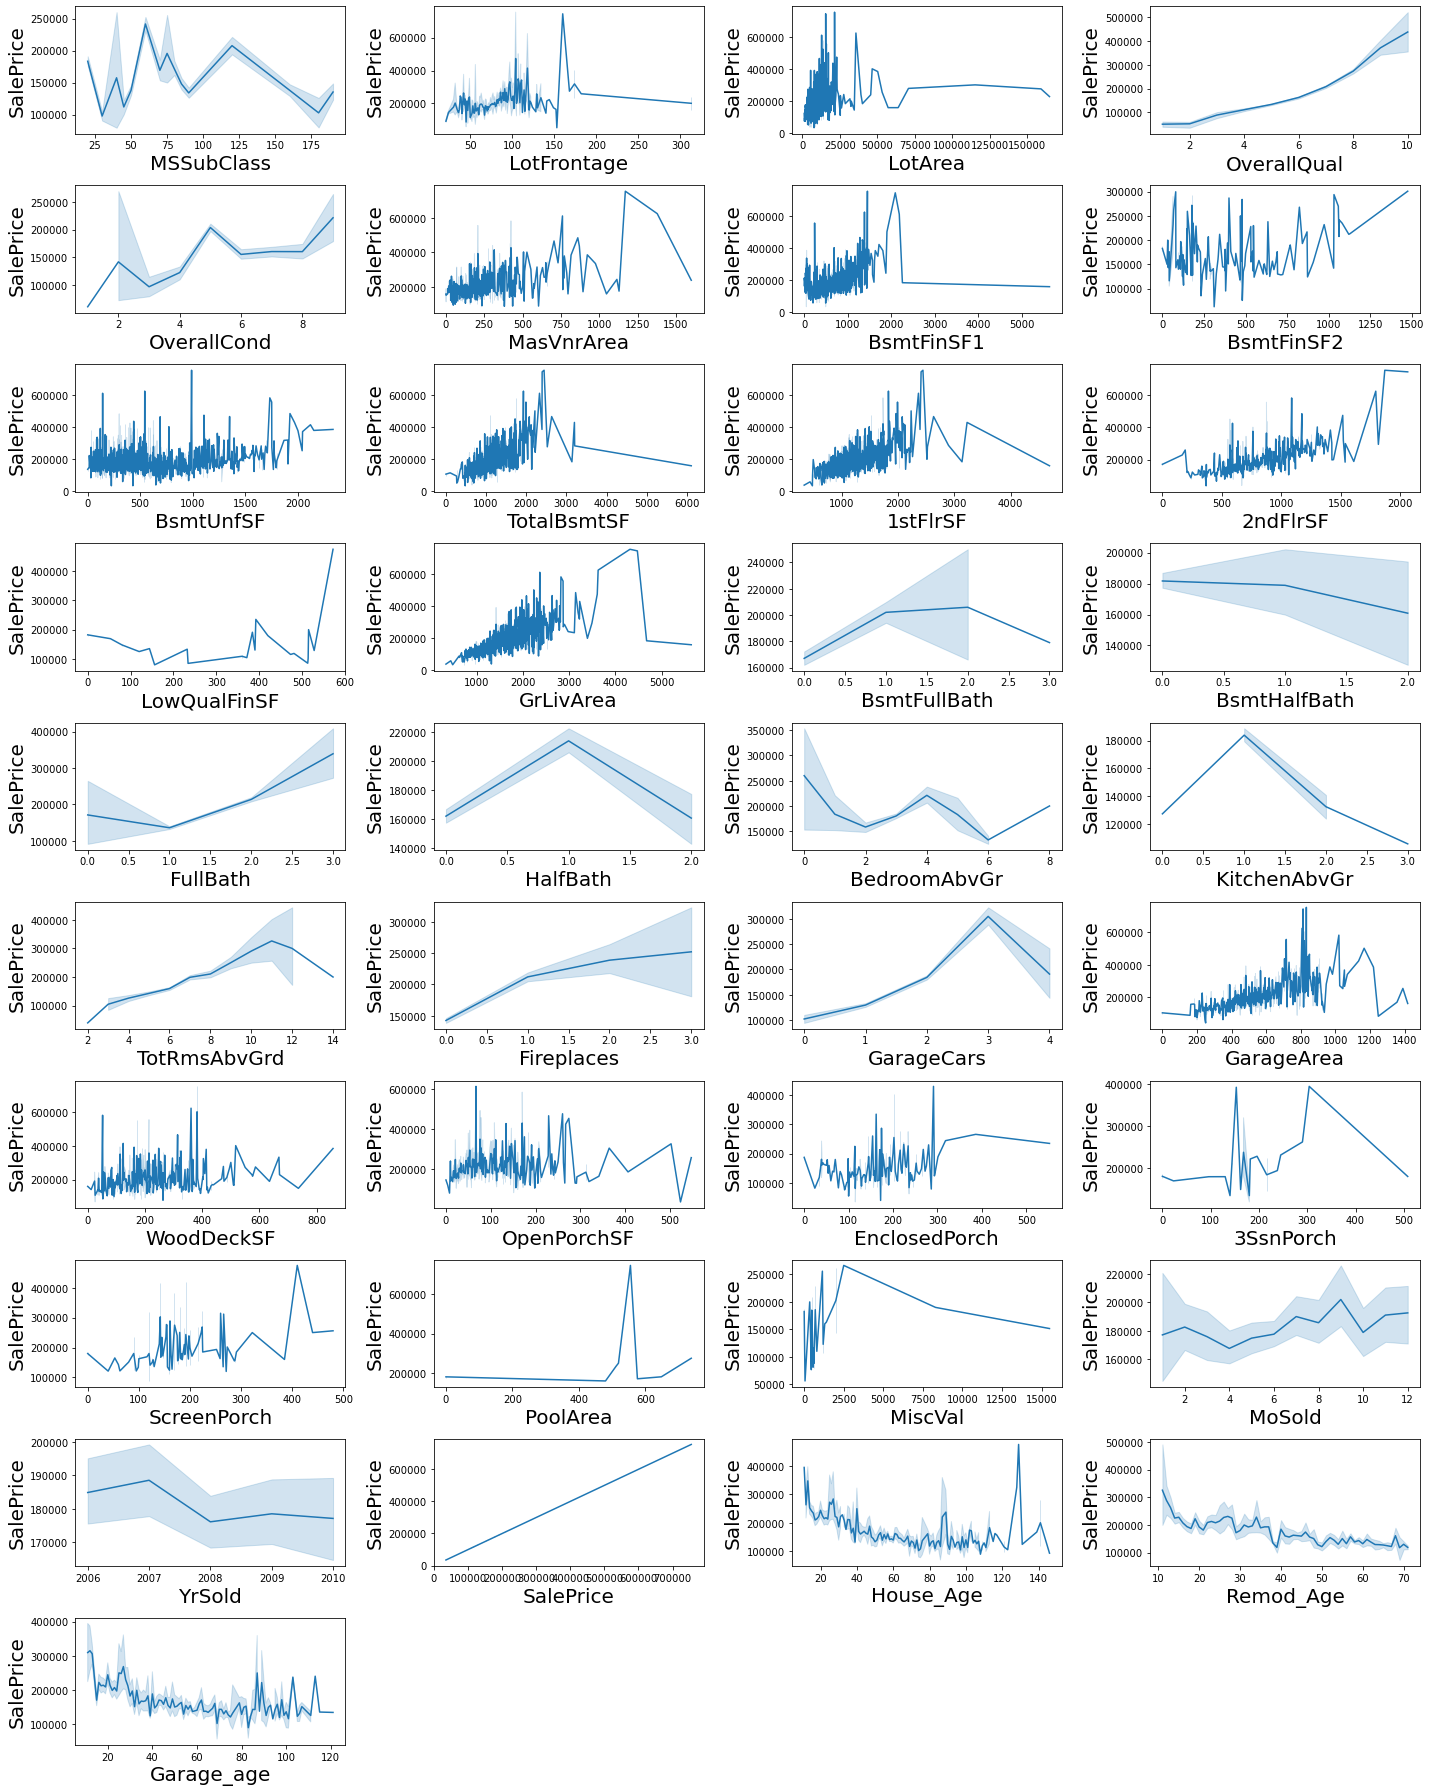

In [88]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = HDF['SalePrice']
HDF.drop(columns=['SalePrice'])
for col in HDF[HDF.columns[HDF.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.lineplot(HDF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

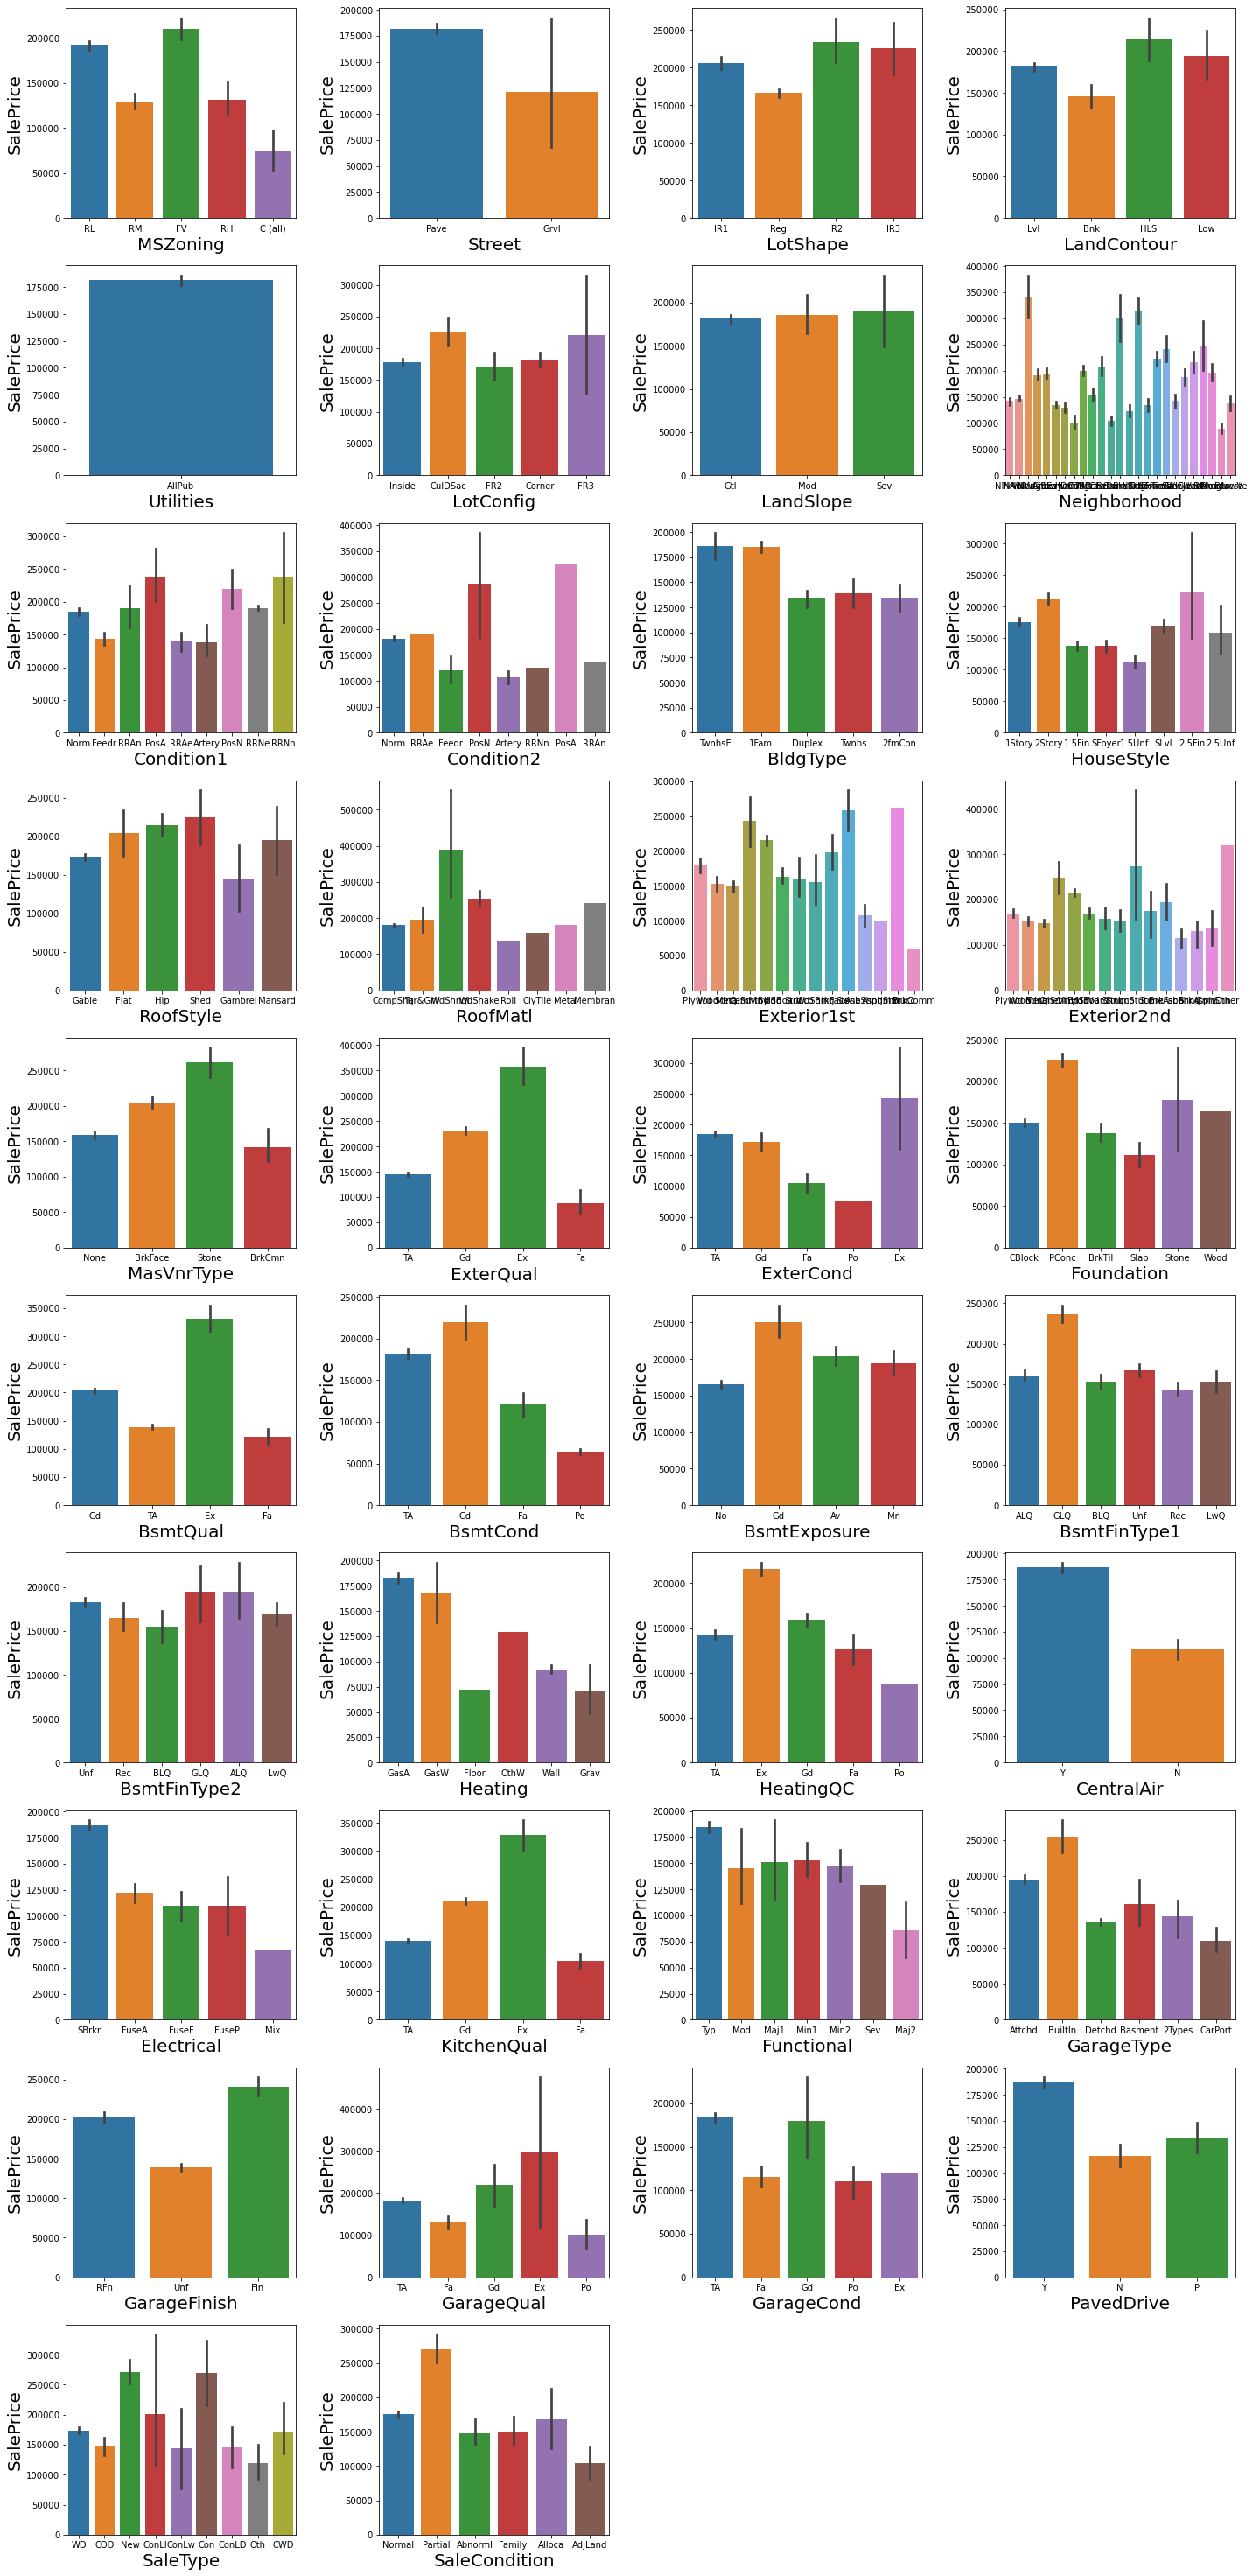

In [89]:
plt.figure(figsize=(20,41),facecolor='white')
plotnum=1
y = HDF['SalePrice']
for col in HDF[HDF.columns[HDF.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.barplot(HDF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

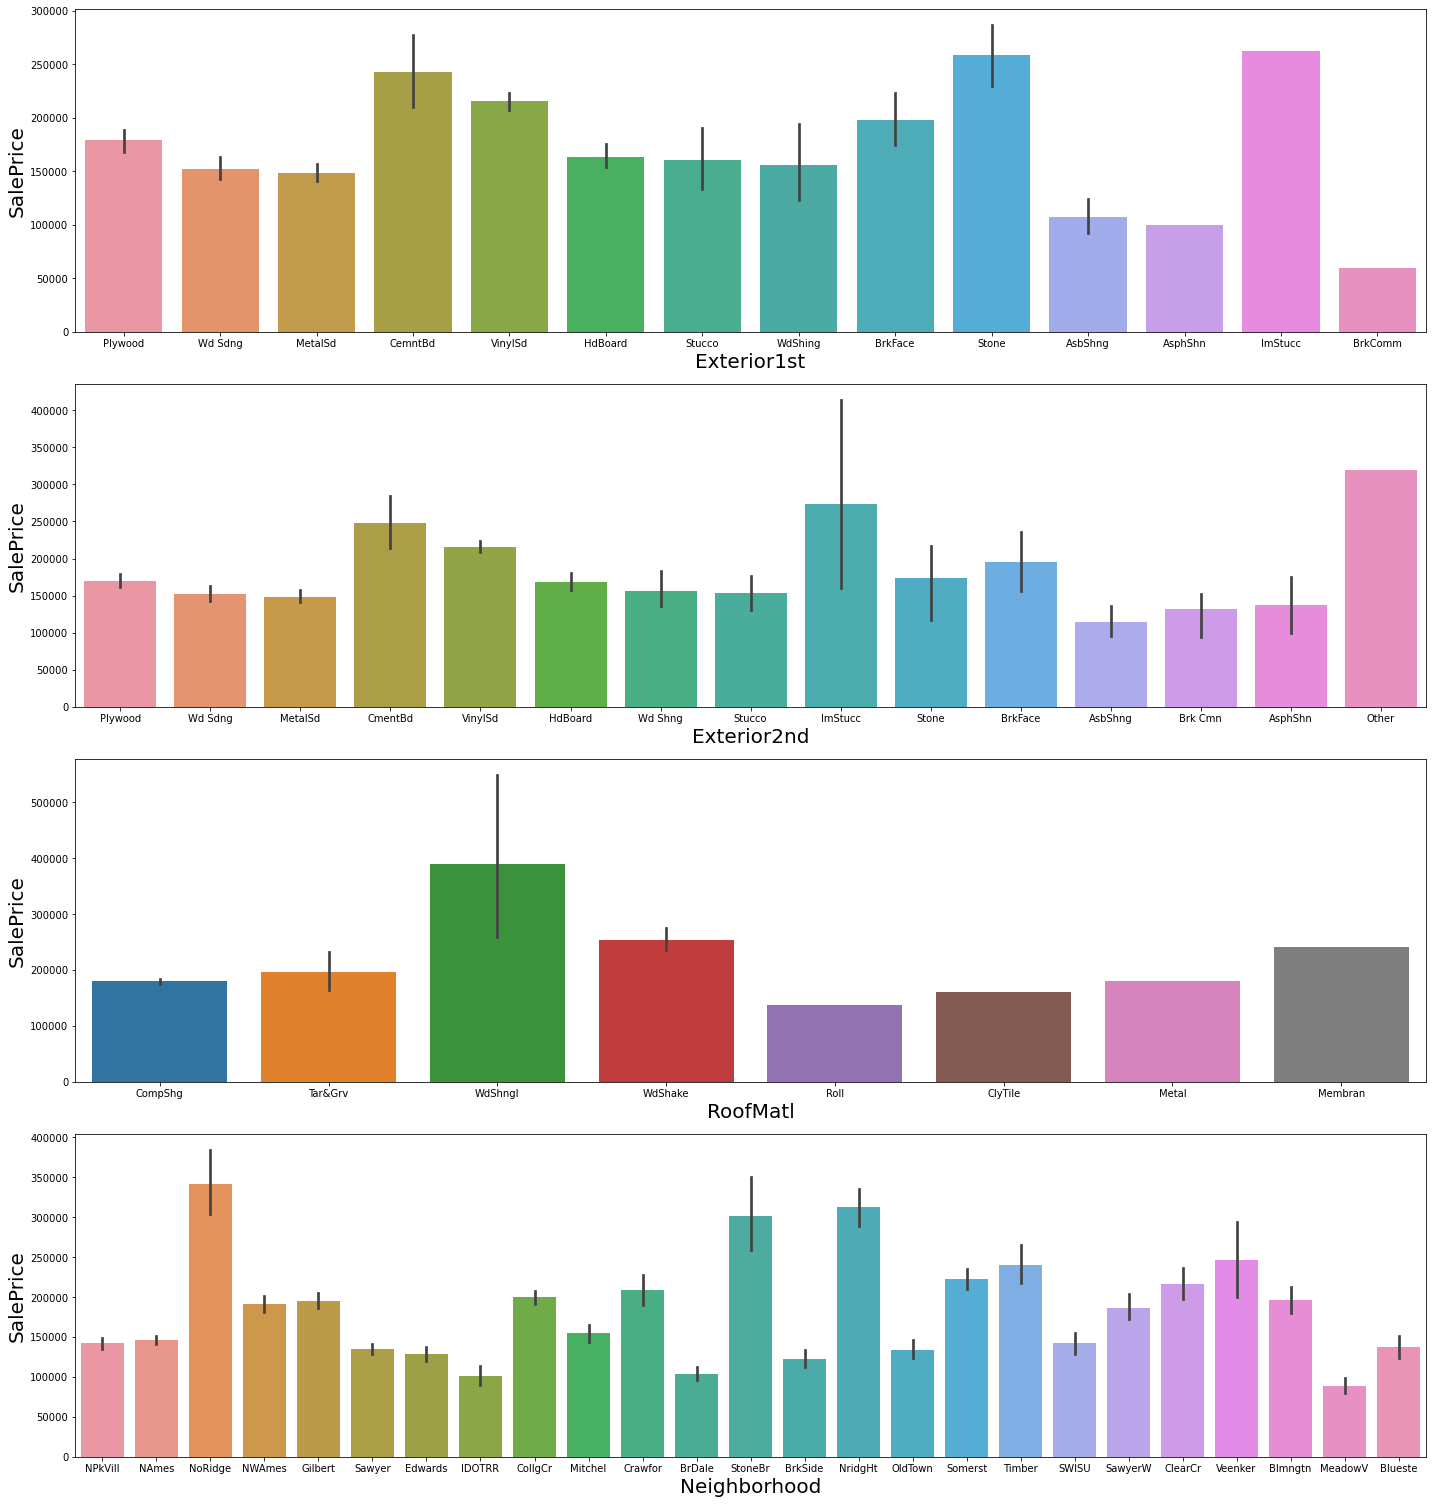

In [90]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
y = HDF['SalePrice']
for col in HDF[['Exterior1st','Exterior2nd','RoofMatl','Neighborhood']]:
    if plotnum<=4:
        plt.subplot(4,1,plotnum)
        sns.barplot(HDF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

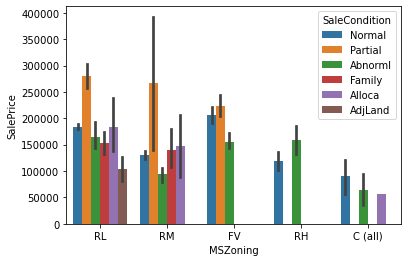

In [91]:
sns.barplot(HDF['MSZoning'],HDF['SalePrice'],hue = HDF['SaleCondition'])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

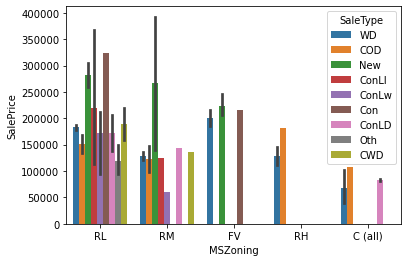

In [92]:
sns.barplot(HDF['MSZoning'],HDF['SalePrice'],hue = HDF['SaleType'])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

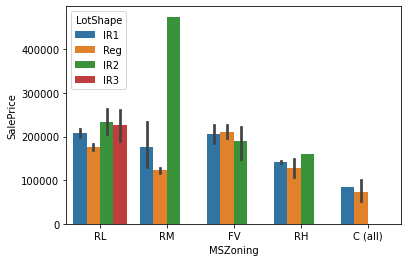

In [93]:
sns.barplot(HDF['MSZoning'],HDF['SalePrice'],hue = HDF['LotShape'])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

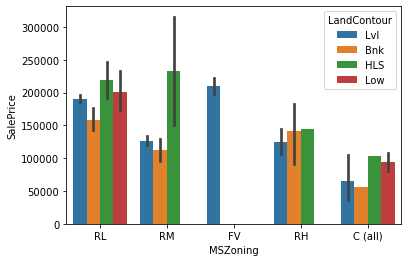

In [94]:
sns.barplot(HDF['MSZoning'],HDF['SalePrice'],hue = HDF['LandContour'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

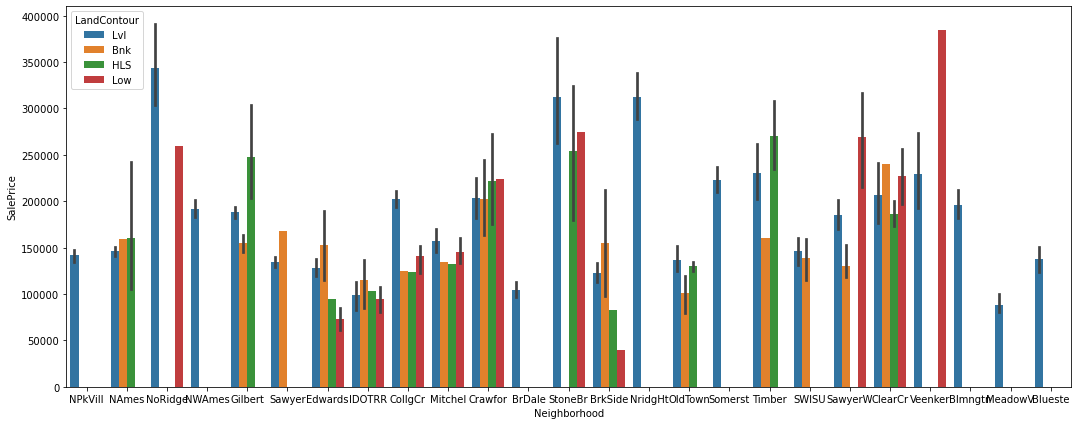

In [95]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(HDF['Neighborhood'],HDF['SalePrice'],hue = HDF['LandContour'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

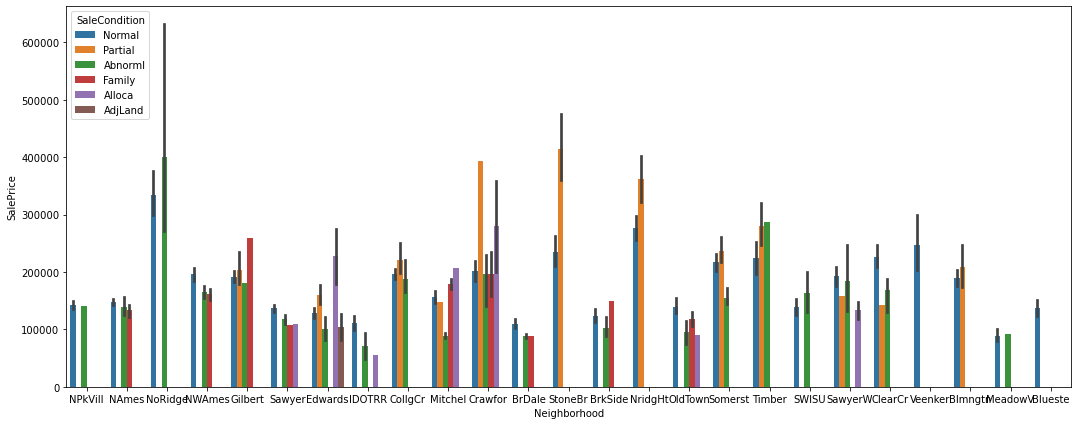

In [96]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(HDF['Neighborhood'],HDF['SalePrice'],hue = HDF['SaleCondition'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

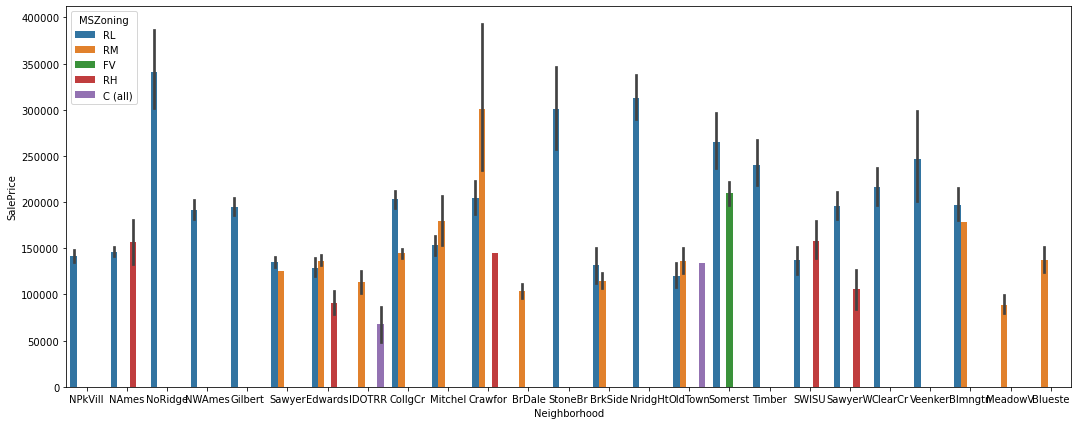

In [97]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(HDF['Neighborhood'],HDF['SalePrice'],hue = HDF['MSZoning'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

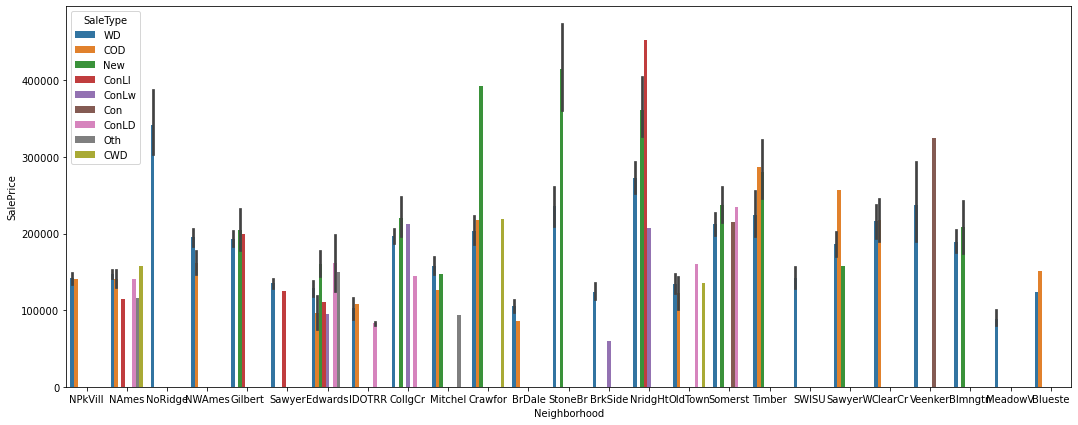

In [98]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(HDF['Neighborhood'],HDF['SalePrice'],hue = HDF['SaleType'])

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

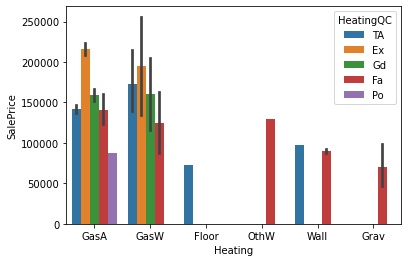

In [99]:
sns.barplot(HDF['Heating'],HDF['SalePrice'],hue = HDF['HeatingQC'])

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

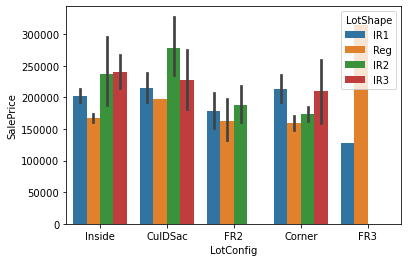

In [100]:
sns.barplot(HDF['LotConfig'],HDF['SalePrice'],hue = HDF['LotShape'])

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

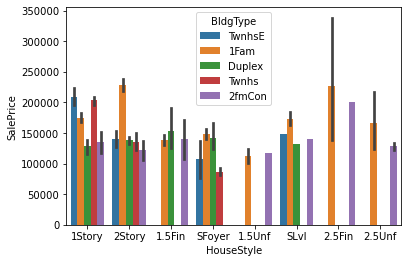

In [101]:
sns.barplot(HDF['HouseStyle'],HDF['SalePrice'],hue = HDF['BldgType'])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

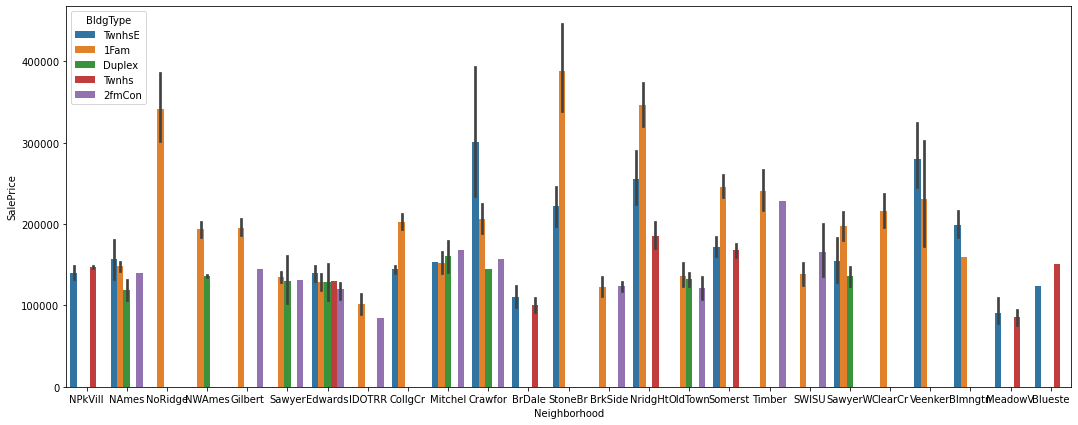

In [102]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(HDF['Neighborhood'],HDF['SalePrice'],hue = HDF['BldgType'])

In [103]:
#Encoding Categorical Columns

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
labenc = LabelEncoder()

In [106]:
for col in HDF[HDF.columns[HDF.dtypes == 'object']]:
    HDF[col] = labenc.fit_transform(HDF[col])

In [107]:
HDF['YrSold'] = HDF.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [108]:
HDF['Utilities'] =HDF.Utilities.map({0:1})

In [109]:
HDF.dtypes[HDF.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
labenc = LabelEncoder()

In [112]:
for col in HDF_test[HDF_test.columns[HDF_test.dtypes == 'object']]:
    HDF_test[col] = labenc.fit_transform(HDF_test[col])

In [113]:
HDF_test['YrSold'] = HDF_test.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [114]:
HDF_test['Utilities'] =HDF_test.Utilities.map({0:1})

In [115]:
HDF_test.dtypes[HDF_test.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities        float64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


In [116]:
h_corr =HDF.corr()

In [117]:
h_corr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
LotShape         0.104485  0.053655    -0.144523 -0.189201 -0.012941   
LandContour     -0.021387  0.001175    -0.073451 -0.159038  0.105226   
Utilities             NaN       NaN          NaN       NaN       NaN   
LotConfig        0.076880 -0.027246    -0.192468 -0.152063  0.000153   
LandSlope       -0.014930 -0.023952     0.046051  0.395410 -0.141572   
Neighborhood     0.013918 -0.251833     0.065824  0.010707  0.001420   
Condition1      -0.042474 -0.025651    -0.025581  0.029520  0.002189   
Condition2      -0.044319  0.031959     0.011761  0.040096  0.001406   
BldgType         0.731815 -0.024776    -0.403220 -0.215345 -0.013606   
HouseStyle       0.381585 -0.110991     0.056321 -0.040637  0.016793   
OverallQual      0.070462 -0.134037     0.229218  0.107188  0.057140   
OverallCond     -0.056978  0.189553    -0.047573  0.017513  0.031082   
RoofStyle       -0.100641  0.000913     0.146222  0.038615 -0.006875   
RoofMatl        -0.032214  0.009719     0.082566  0.194142  0.007889   
Exterior1st     -0.090178 -0.012037     0.087727  0.048265  0.012482   
Exterior2nd     -0.120022  0.005548     0.110762  0.027328  0.014618   
MasVnrType      -0.013252 -0.033521    -0.034388 -0.005204  0.000822   
MasVnrArea       0.028215 -0.059170     0.188108  0.120192  0.024363   
ExterQual       -0.024133  0.184815    -0.169835 -0.057865  0.044509   
ExterCond        0.004186 -0.099269     0.044582  0.011438  0.017738   
Foundation       0.053951 -0.244844     0.090734 -0.021195  0.032701   
BsmtQual        -0.052242  0.123822    -0.176402 -0.075262 -0.031959   
BsmtCond        -0.013220  0.002336     0.043165  0.010165 -0.017190   
BsmtExposure    -0.068192  0.037414    -0.123896 -0.136900  0.065253   
BsmtFinType1     0.017515  0.021518    -0.031507 -0.053584 -0.006420   
BsmtFinSF1      -0.052236 -0.034161     0.228996  0.221851 -0.009066   
BsmtFinType2     0.040573 -0.031322    -0.007509 -0.084713  0.045208   
BsmtFinSF2      -0.062403  0.027055     0.002159  0.056656  0.003550   
BsmtUnfSF       -0.134170 -0.032638     0.113924  0.006600  0.024205   
TotalBsmtSF     -0.214042 -0.058896     0.356107  0.259733  0.016422   
Heating          0.047734  0.051188    -0.026622 -0.020394  0.006981   
HeatingQC       -0.001994  0.119852    -0.078262 -0.003337 -0.047968   
CentralAir      -0.113883 -0.015887     0.077404  0.051182  0.043024   
Electrical       0.045533 -0.079205     0.066868  0.050388  0.038720   
1stFlrSF        -0.227927 -0.033095     0.403436  0.312843  0.011486   
2ndFlrSF         0.300366 -0.048968     0.089675  0.059803  0.040957   
LowQualFinSF     0.053737  0.012098     0.007506 -0.001915  0.007352   
GrLivArea        0.086448 -0.064125     0.374251  0.281360  0.043322   
BsmtFullBath     0.004556 -0.007287     0.094046  0.142387 -0.036483   
BsmtHalfBath     0.008207  0.006345     0.001389  0.059282  0.013788   
FullBath         0.140807 -0.188837     0.171773  0.123197  0.033208   
HalfBath         0.168423 -0.121209     0.047816  0.007271  0.045146   
BedroomAbvGr    -0.013283 -0.001906     0.237199  0.117351  0.027587   
KitchenAbvGr     0.283506  0.026744    -0.002729 -0.013075  0.012304   
KitchenQual     -0.011378  0.111689    -0.174713 -0.064278 -0.012056   
TotRmsAbvGrd     0.051179 -0.031062     0.318771  0.184546  0.038259   
Functional       0.022913 -0.091684     0.039272 -0.033165 -0.015309   
Fireplaces      -0.035792  0.010658     0.230610  0.285983  0.010574   
GarageType       0.077469  0.125155    -0.216237 -0.123746 -0.000824   
GarageFinish    -0.000067  0.162566    -0.192961 -0.117

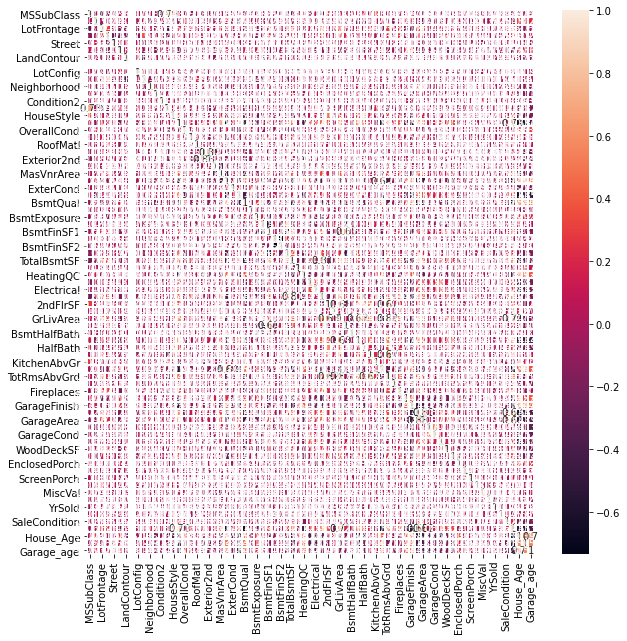

In [118]:
plt.figure(figsize=(10,10))
sns.heatmap(h_corr,annot=True,linewidth=1)
plt.show()

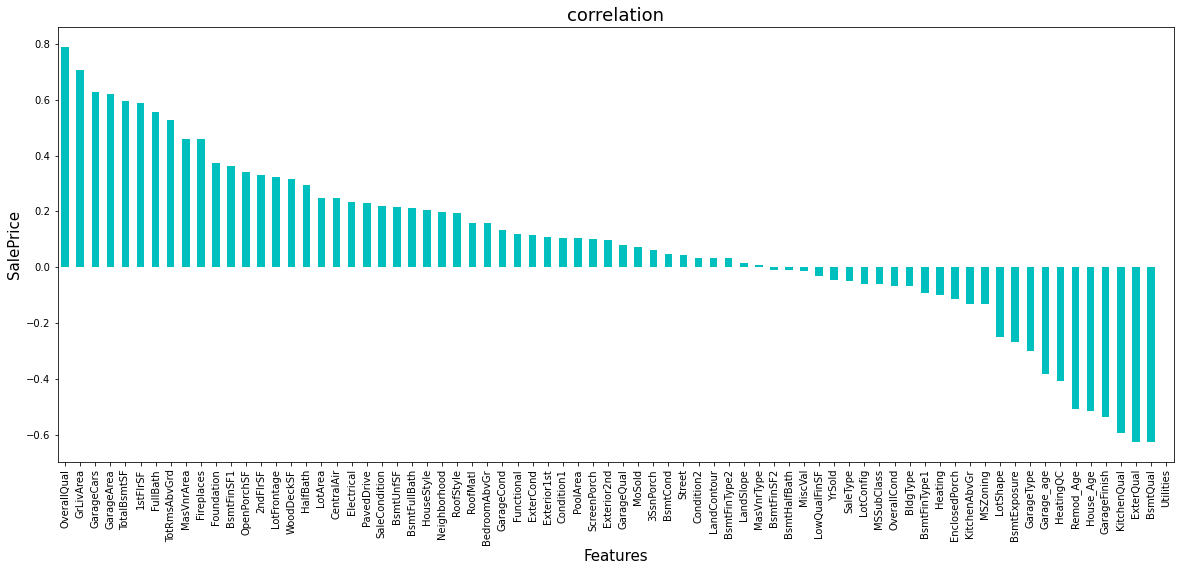

In [119]:
plt.figure(figsize = (20,8))
HDF.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('SalePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [120]:
#Dropping column 'Utilities' since it doesn't contribute to building a good model for predicting the target variable values.

In [121]:
HDF.drop(columns = ['Utilities'],inplace=True)

In [122]:
HDF_test.drop(columns = ['Utilities'],inplace=True)

In [123]:
df2 =HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].copy()

In [124]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [125]:
df3.shape

(1006, 14)

In [126]:
df2.shape

(1168, 14)

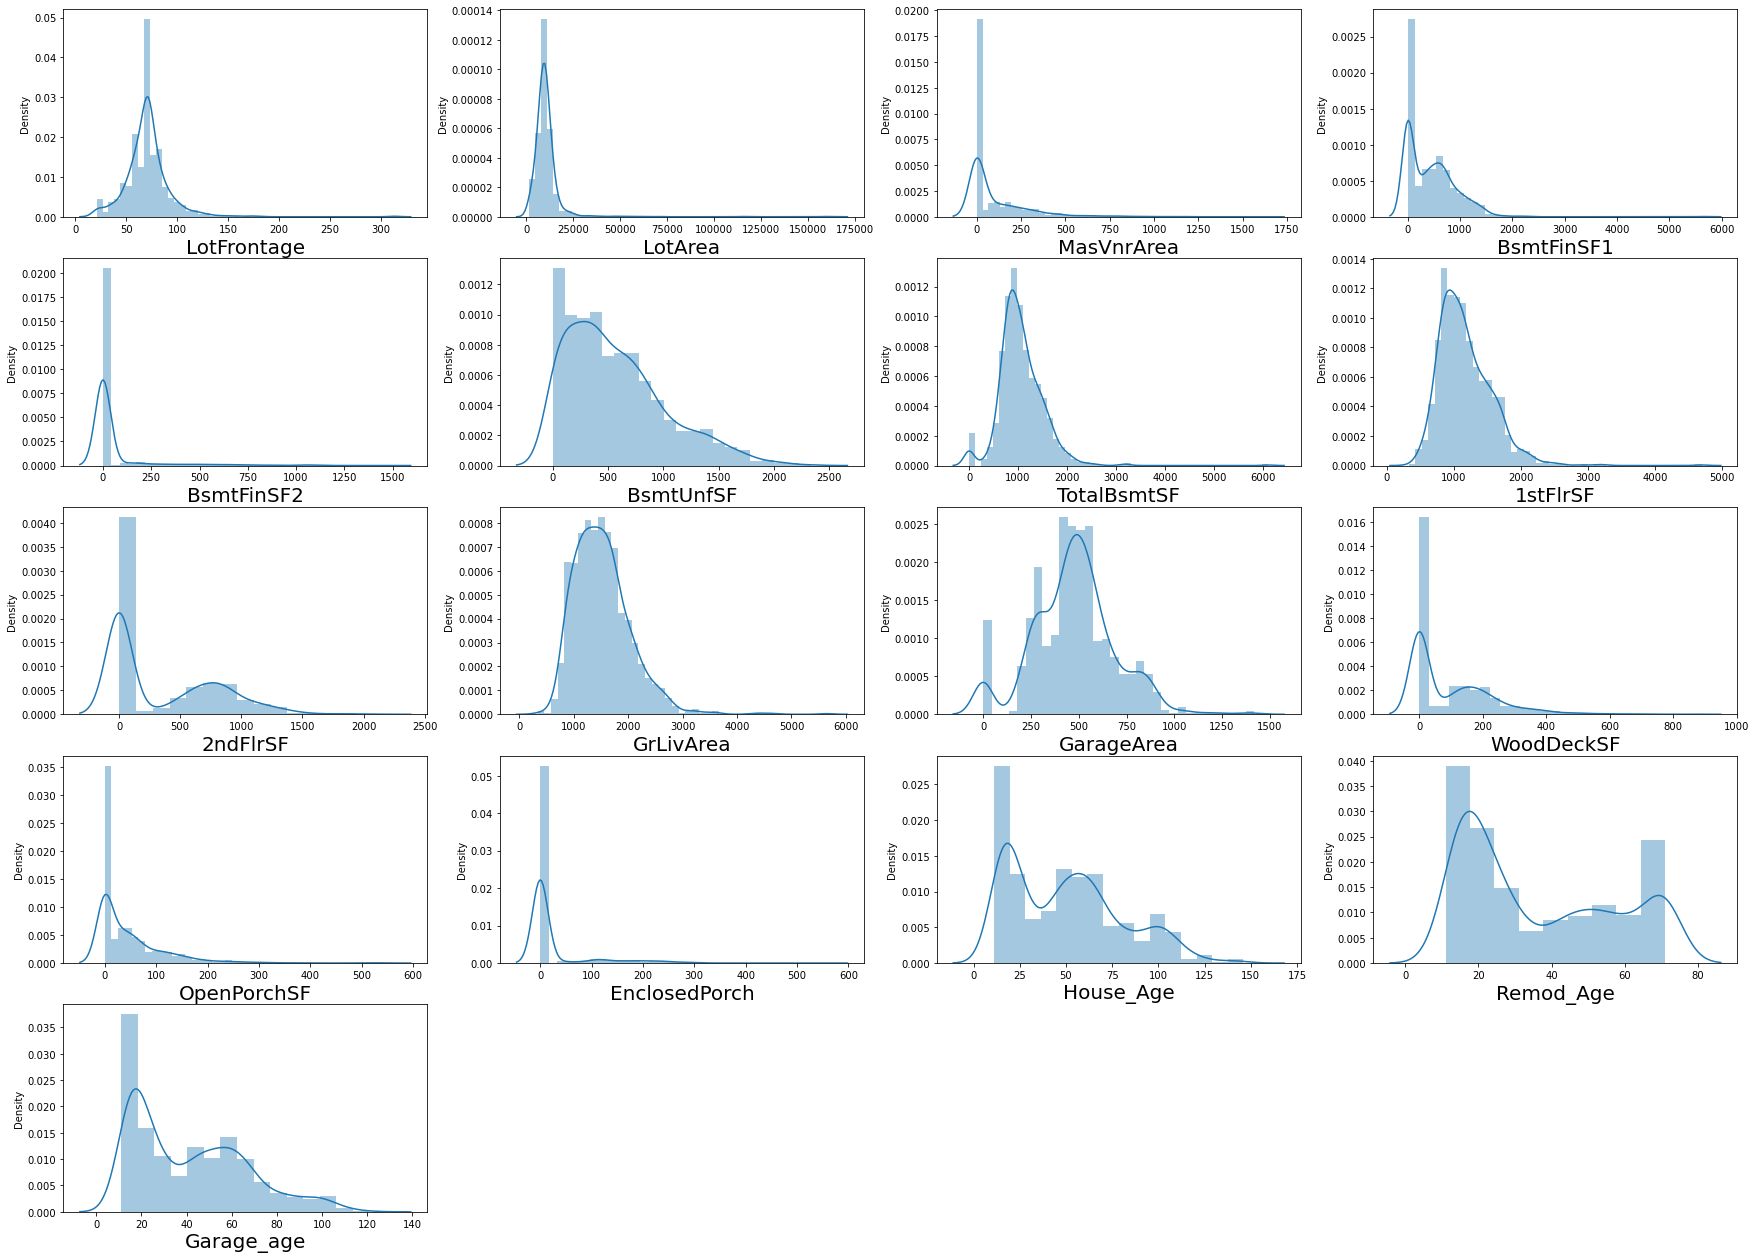

In [127]:
#Normalizing Data Distribution using PowerTransformer
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(HDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [128]:
HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
House_Age         0.579204
Remod_Age         0.495864
Garage_age        0.708074
dtype: float64

In [129]:
from sklearn.preprocessing import PowerTransformer

In [130]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [131]:
df4 = HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [132]:
transformed= powtrans.fit_transform(df4)

In [133]:
type(transformed)

numpy.ndarray

In [134]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [135]:
transformed.skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
dtype: float64

In [136]:
transformed.index = HDF.index

In [137]:
HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [138]:
HDF[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
House_Age        0.579204
Remod_Age        0.495864
Garage_age       0.708074
dtype: float64

In [139]:
from sklearn.preprocessing import PowerTransformer

In [140]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [141]:
df4 = HDF_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [142]:
transformed= powtrans.fit_transform(df4)

In [143]:
type(transformed)

numpy.ndarray

In [144]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [145]:
transformed.skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
dtype: float64

In [146]:
transformed.index = HDF_test.index

In [148]:
HDF_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]


In [149]:
HDF_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
House_Age        0.755233
Remod_Age        0.535600
Garage_age       0.742835
dtype: float64

# Feature Selection

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = HDF.drop(columns = ['SalePrice'])
y = HDF['SalePrice']

In [152]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [153]:
#Checking for Multicollinearity using Variance Inflation Factor

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
vif = pd.DataFrame()

In [156]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [157]:
vif

Features        vif
0      MSSubClass   5.507317
1        MSZoning   1.382987
2     LotFrontage   2.174714
3         LotArea   2.900531
4          Street   1.131134
5        LotShape   1.294356
6     LandContour   1.329432
7       LotConfig   1.159877
8       LandSlope   1.481140
9    Neighborhood   1.279199
10     Condition1   1.159503
11     Condition2   1.122465
12       BldgType   5.184126
13     HouseStyle   2.467453
14    OverallQual   4.148229
15    OverallCond   1.959803
16      RoofStyle   1.299948
17       RoofMatl   1.203587
18    Exterior1st   4.362735
19    Exterior2nd   4.381901
20     MasVnrType   1.537917
21     MasVnrArea   1.973891
22      ExterQual   2.676707
23      ExterCond   1.220117
24     Foundation   2.130516
25       BsmtQual   2.321614
26       BsmtCond   1.192534
27   BsmtExposure   1.579126
28   BsmtFinType1   3.198546
29     BsmtFinSF1   6.770522
30   BsmtFinType2   4.019272
31     BsmtFinSF2   4.504940
32      BsmtUnfSF   5.323098
33    TotalBsmtSF   6.927810
34        Heating   1.317820
35      HeatingQC   1.696584
36     CentralAir   1.725971
37     Electrical   1.379424
38       1stFlrSF  17.623835
39       2ndFlrSF  17.357365
40   LowQualFinSF   1.532083
41      GrLivArea  28.469724
42   BsmtFullBath   2.322177
43   BsmtHalfBath   1.246433
44       FullBath   3.275114
45       HalfBath   2.467475
46   BedroomAbvGr   2.828754
47   KitchenAbvGr   1.855924
48    KitchenQual   2.068553
49   TotRmsAbvGrd   5.190507
50     Functional   1.253417
51     Fireplaces   1.720801
52     GarageType   1.792019
53   GarageFinish   2.089285
54     GarageCars   6.283705
55     GarageArea   6.196549
56     GarageQual   1.643079
57     GarageCond   1.576242
58     PavedDrive   1.541041
59     WoodDeckSF   1.360420
60    OpenPorchSF   1.612450
61  EnclosedPorch   1.419331
62      3SsnPorch   1.065638
63    ScreenPorch   1.160073
64       PoolArea   1.133082
65        MiscVal   1.087232
66         MoSold   1.089278
67         YrSold   1.101954
68       SaleType   1.121925
69  SaleCondition   1.199333
70      House_Age   8.061473
71      Remod_Age   2.933032
72     Garage_age   2.888644

# Principle Component Analysis

In [158]:
from sklearn.decomposition import PCA

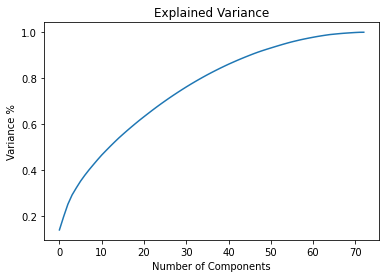

In [159]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

# Selecting Kbest Features

In [160]:
from sklearn.feature_selection import SelectKBest, f_classif

In [161]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [162]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

          Feature     Score
14    OverallQual  5.303071
65        MiscVal  3.564855
22      ExterQual  3.514221
41      GrLivArea  2.956955
25       BsmtQual  2.876879
48    KitchenQual  2.617125
54     GarageCars  2.578547
44       FullBath  2.435854
55     GarageArea  2.242545
53   GarageFinish  2.187163
70      House_Age  2.133300
33    TotalBsmtSF  2.070692
38       1stFlrSF  2.060541
4          Street  1.835751
71      Remod_Age  1.813783
34        Heating  1.707885
49   TotRmsAbvGrd  1.656866
1        MSZoning  1.640044
60    OpenPorchSF  1.613273
51     Fireplaces  1.591973
36     CentralAir  1.557680
72     Garage_age  1.535466
24     Foundation  1.528516
5        LotShape  1.407526
3         LotArea  1.405080
29     BsmtFinSF1  1.385210
35      HeatingQC  1.358939
45       HalfBath  1.337597
9    Neighborhood  1.281079
21     MasVnrArea  1.259874
59     WoodDeckSF  1.246439
27   BsmtExposure  1.214154
2     LotFrontage  1.212723
26       BsmtCond  1.190161
17       RoofMatl  1

In [163]:
X.shape

(1168, 73)

# Selecting best features based on their scores:

In [164]:
x_best = X.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [165]:
scaled_x_best = scaler.fit_transform(x_best)

This is a Regression Problem since Target/ Label column ('SalePrice') has Continuous type of Data.

# Regression Model Building

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
from sklearn.metrics import r2_score

# Finding the Best Random State

In [168]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9169670783924724 on random_state: 72


In [169]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =72)

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [173]:
pip install xgboost

In [174]:
from xgboost import XGBRegressor

In [175]:
from sklearn.metrics import r2_score,mean_squared_error

In [176]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

In [177]:
#Training the Models

In [178]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [179]:
#Ridge Regression Model

In [180]:
y_r_pred = r.predict(x_test)

In [181]:
r2_score(y_test,y_r_pred)

0.8581092136367106

In [182]:
mean_squared_error(y_test,y_r_pred)

860008392.6691439

In [183]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

29325.89969070248

# Random Forest Regression Model

In [184]:
y_rf_pred = rf.predict(x_test)

In [185]:
r2_score(y_test,y_rf_pred)

0.9182291622345533

In [186]:
mean_squared_error(y_test,y_rf_pred)

495617851.9852477

In [187]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

22262.476321946928

# XGB Regression Model

In [188]:
y_xg_pred = xg.predict(x_test)

In [189]:
r2_score(y_test,y_xg_pred)

0.8990045700516924

In [190]:
mean_squared_error(y_test,y_xg_pred)

612139234.7096407

In [191]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

24741.447708443433

# Support Vector Regression Model

In [192]:
y_svr_pred = SV.predict(x_test)

In [193]:
r2_score(y_test,y_svr_pred)

-0.061666480005083235

In [194]:
mean_squared_error(y_test,y_svr_pred)

6434822911.490364

In [195]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

80217.34794600458

# Decision Tree Regression Model

In [196]:
y_dt_pred = dt.predict(x_test)

In [197]:
r2_score(y_test,y_dt_pred)

0.7764384088476062

In [198]:
mean_squared_error(y_test,y_dt_pred)

1355019938.9075344

In [199]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

36810.5954707002

In [200]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [201]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.7724187373088182

In [202]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8400652162065867

In [203]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.8317857020177609

In [204]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.06178097265098006

In [205]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.7176830789479298

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

# Random Forest Regressor

In [207]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[1,2,5,10,20,30],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [208]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [210]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


KeyboardInterrupt: 

In [212]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mae', max_depth= 40, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 5)

In [213]:
Best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=80)

In [214]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

90.1089266342966


In [215]:
import joblib
joblib.dump(Best_mod,"BestModelPFA.pkl")

['BestModelPFA.pkl']

# Preparing the Test Dataset

In [216]:
xtest_best = HDF_test.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [217]:
scaled_xtest_best = scaler.fit_transform(xtest_best)

In [218]:
mod=joblib.load("BestModelPFA.pkl")

In [219]:
print(mod.predict(scaled_xtest_best))

[318901.025   202428.33125 262574.93125 159969.91875 237393.06875
  99748.5625  143784.4875  315807.7375  244153.8     161281.6875
  90838.8125  145737.25    122853.65625 199297.4625  298474.66875
 129212.2     119628.75    127332.3375  173799.18125 191804.2875
 147378.65    153596.5875  151411.875   110480.3625  106383.05
 129425.15625 180586.34375 145726.8875  169033.1625  112959.925
 141642.8125  195759.1     231257.00625 161800.3125  115624.675
 178342.8375  193758.675   122433.175   168713.48125 145987.95
 109930.75    311525.81875 204238.30625 191699.85625 143158.29375
 128586.9     132993.5375  109601.3625  217496.9     339158.4375
 138753.0125  207304.5125  110950.9125   97830.625   298068.70625
 129524.      142769.25    186816.7375  119776.61875 254033.9875
 110597.55    176022.5625  131035.53125 152158.98125 196194.3875
 115853.375   158479.35625 209688.2625  138500.9375  159842.5
 271109.4     171405.625   168868.5875  157525.5125  146765.1375
 232157.275   301135.7375  203

In [220]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_xtest_best), 'Actual Values': y[0:292]})
Prediction_accuracy

Predictions  Actual Values
0    318901.02500         128000
1    202428.33125         268000
2    262574.93125         269790
3    159969.91875         190000
4    237393.06875         215000
5     99748.56250         219210
6    143784.48750         121500
7    315807.73750         155000
8    244153.80000         140000
9    161281.68750         118500
10    90838.81250         119500
11   145737.25000         237000
12   122853.65625         201000
13   199297.46250         126500
14   298474.66875         135500
15   129212.20000         165000
16   119628.75000         120500
17   127332.33750         194500
18   173799.18125         148000
19   191804.28750         106000
20   147378.65000         231500
21   153596.58750         133000
22   151411.87500         142125
23   110480.36250         136500
24   106383.05000         146000
25   129425.15625         217000
26   180586.34375         112000
27   145726.88750         394432
28   169033.16250         113000
29   112959.92500         188700
30   141642.81250         319900
31   195759.10000         135000
32   231257.00625         190000
33   161800.31250         128500
34   115624.67500         169000
35   178342.83750         122000
36   193758.67500         152000
37   122433.17500         243000
38   168713.48125         156000
39   145987.95000          79500
40   109930.75000         215000
41   311525.81875         132000
42   204238.30625         144152
43   191699.85625         130000
44   143158.29375         149900
45   128586.90000         124500
46   132993.53750         179000
47   109601.36250         147000
48   217496.90000          39300
49   339158.43750         155000
50   138753.01250         312500
51   207304.51250         256000
52   110950.91250          60000
53    97830.62500         153000
54   298068.70625          84900
55   129524.00000         230000
56   142769.25000         180000
57   186816.73750         190000
58   119776.61875         106500
59   254033.98750         239000
60   110597.55000         107500
61   176022.56250         123000
62   131035.53125         176000
63   152158.98125         228500
64   196194.38750         117500
65   115853.37500         350000
66   158479.35625         130000
67   209688.26250         130000
68   138500.93750         200624
69   159842.50000         148000
70   271109.40000         173000
71   171405.62500         225000
72   168868.58750          84500
73   157525.51250         174900
74   146765.13750          79000
75   232157.27500         297000
76   301135.73750         135000
77   203199.23125          87000
78   288442.86875         465000
79   147022.18750         215000
80   205451.30000         204900
81   140865.53750         127000
82   150964.25000         159000
83   163869.60625         170000
84   184445.12500         159500
85   244883.50625         102000
86   118835.67500         109500
87   346828.26250         163990
88   157467.28750         189950
89   182123.63750         119000
90   243812.48125         157500
91   135567.59375         287000
92   146270.61250         144000
93   125914.26250         286000
94   193674.93750         172000
95   158020.43750         212000
96   243786.48750         144000
97   172362.90625         124000
98   344280.35625         150000
99   125832.66250         205950
100  248353.69375         251000
101  113005.70000         129000
102  121093.95000         223500
103  166482.88750         475000
104  190279.72500         335000
105  137695.37500         115000
106  282684.01250         205000
107  152795.40000         135000
108  197194.09375         209500
109  205484.53125         120500
110  203008.29375         190000
111  166125.62500         176432
112  191614.96875         171000
113  223330.83750         302000
114  127251.26875         259500
115  113523.55000         155000
116  130991.56250         141000
117  189892.26250         187500
118  146849.63750         170000
119  117288.79375         385000
120  106682.1